### Exploratory Data Analysis (EDA)


In [22]:
# Exploratory Data Analysis (EDA) untuk Dataset Obesitas
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# 1. MEMBACA DATA
# Upload file terlebih dahulu di Colab
from google.colab import files
uploaded = files.upload()  # Upload ObesityDataSet.csv

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/Bengkel Koding/CAPSTONE PROJECT/ObesityDataSet.csv')

Saving ObesityDataSet.csv to ObesityDataSet (1).csv


In [23]:
# Menampilkan 5 baris pertama
print("5 BARIS PERTAMA DATASET:")
print(df.head())
print("\n" + "="*80 + "\n")

# Menampilkan informasi umum dataset
print("INFORMASI UMUM DATASET:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print("\n" + "="*80 + "\n")

# Menampilkan tipe data dari masing-masing kolom
print("TIPE DATA SETIAP KOLOM:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

# Menampilkan informasi umum (termasuk nilai null)
print("INFORMASI LENGKAP DATASET:")
print(df.info())
print("\n" + "="*80 + "\n")

# Menampilkan statistik deskriptif dari kolom numerik
print("STATISTIK DESKRIPTIF KOLOM NUMERIK:")
print(df.describe())
print("\n" + "="*80 + "\n")

# Menampilkan statistik deskriptif dari kolom kategorikal
print("STATISTIK DESKRIPTIF KOLOM KATEGORIKAL:")
print(df.describe(include=['object']))
print("\n" + "="*80 + "\n")

# Menampilkan jumlah nilai null/missing value per kolom
print("JUMLAH NILAI NULL PER KOLOM:")
print(df.isnull().sum())
print("\n" + "="*80 + "\n")

# Menampilkan distribusi nilai dari kolom target
print("DISTRIBUSI KELAS TARGET (NObeyesdad):")
target_counts = df['NObeyesdad'].value_counts()
print(target_counts)
print("\nPersentase:")
print(100 * target_counts / len(df))

5 BARIS PERTAMA DATASET:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_W

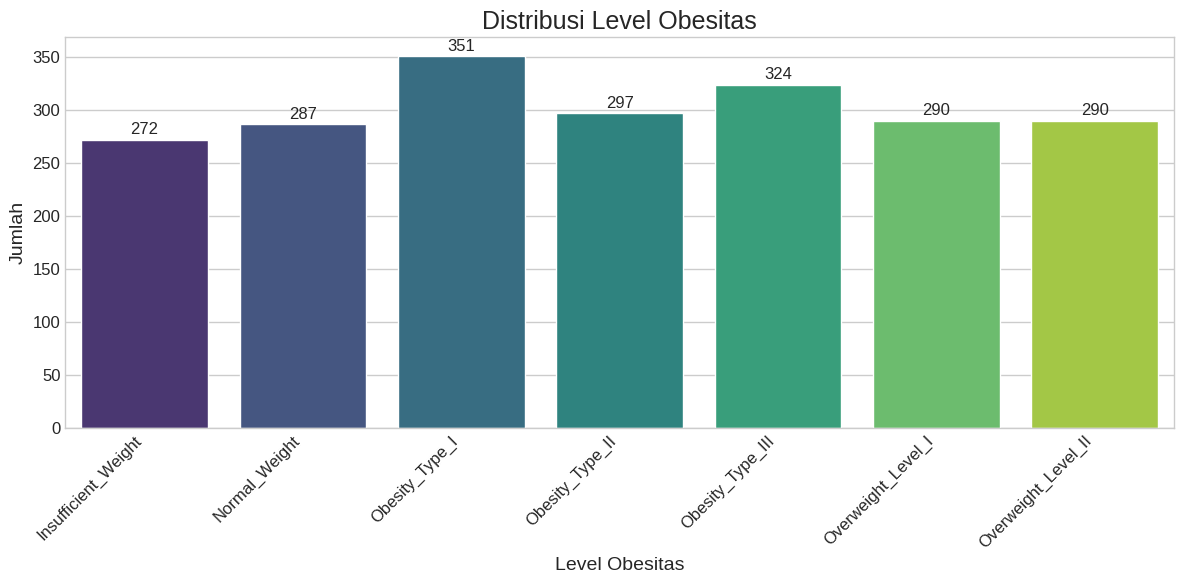

In [25]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Mengatur ukuran plot dan gaya visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

# 1. VISUALISASI DISTRIBUSI KELAS TARGET
plt.figure(figsize=(12, 6))
target_counts = df['NObeyesdad'].value_counts().sort_index()
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Distribusi Level Obesitas', fontsize=18)
plt.xlabel('Level Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(target_counts.values):
    ax.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.savefig('distribusi_obesitas.png')
plt.show()

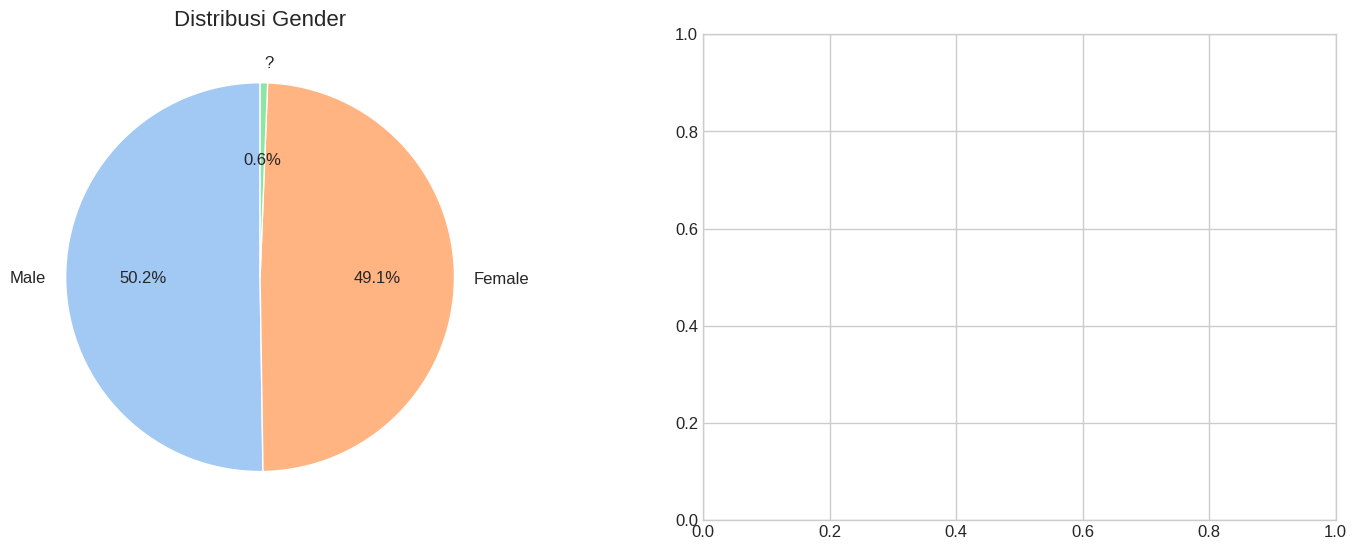

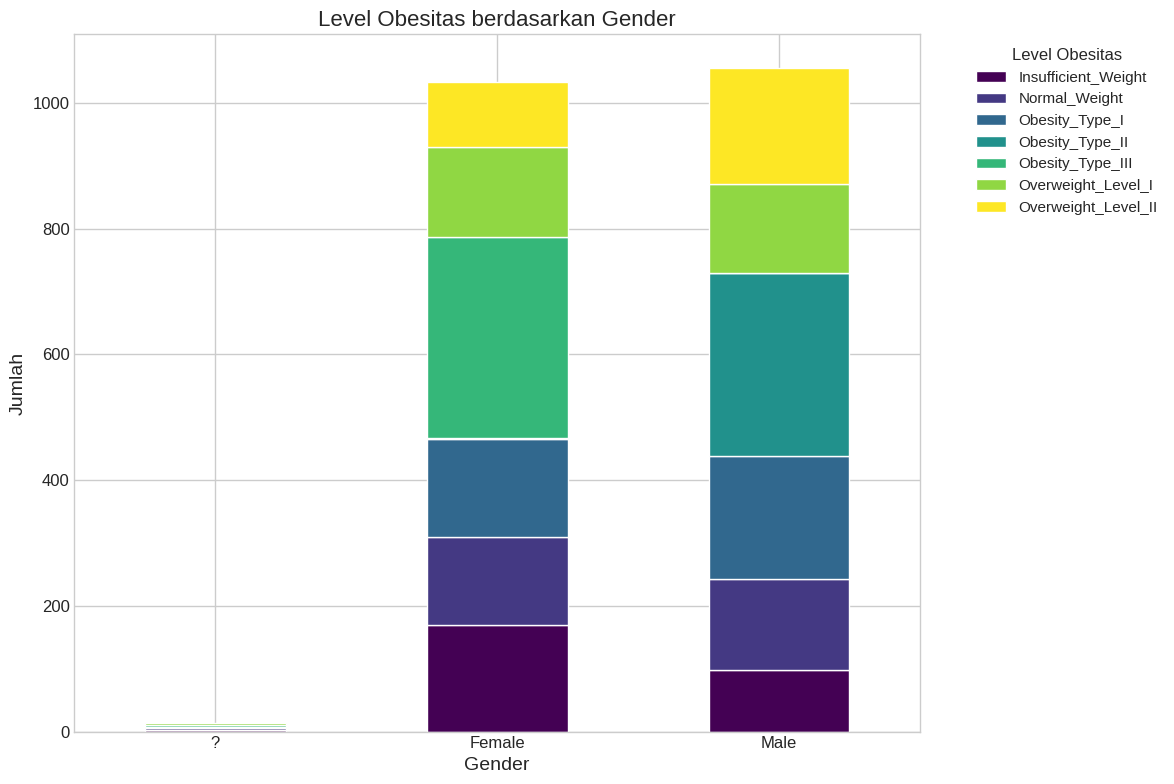

In [29]:
# 2. VISUALISASI BERDASARKAN GENDER
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('Distribusi Gender', fontsize=16)

plt.subplot(1, 2, 2)
gender_obesity = pd.crosstab(df['Gender'], df['NObeyesdad'])
gender_obesity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Level Obesitas berdasarkan Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Level Obesitas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('gender_obesitas.png')
plt.show()

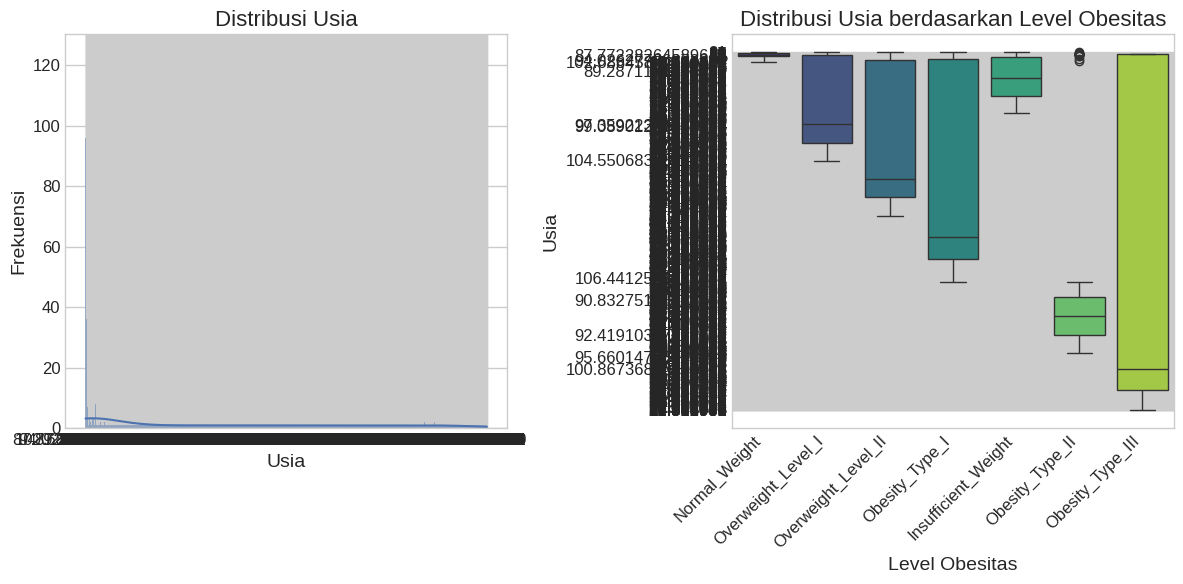

In [32]:
# 3. VISUALISASI DISTRIBUSI USIA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribusi Usia', fontsize=16)
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad', y='Age', data=df, palette='viridis')
plt.title('Distribusi Usia berdasarkan Level Obesitas', fontsize=16)
plt.xlabel('Level Obesitas')
plt.ylabel('Usia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('usia_obesitas.png')
plt.show()

Jumlah data yang valid untuk BMI: 2070 dari 2111 total
Statistik BMI:
count    2070.000000
mean       30.343341
std        11.827284
min         6.371475
25%        24.338549
50%        28.861828
75%        36.115123
max       153.690334
Name: BMI, dtype: float64
Jumlah data setelah filter outlier BMI: 2007 dari 2111 total


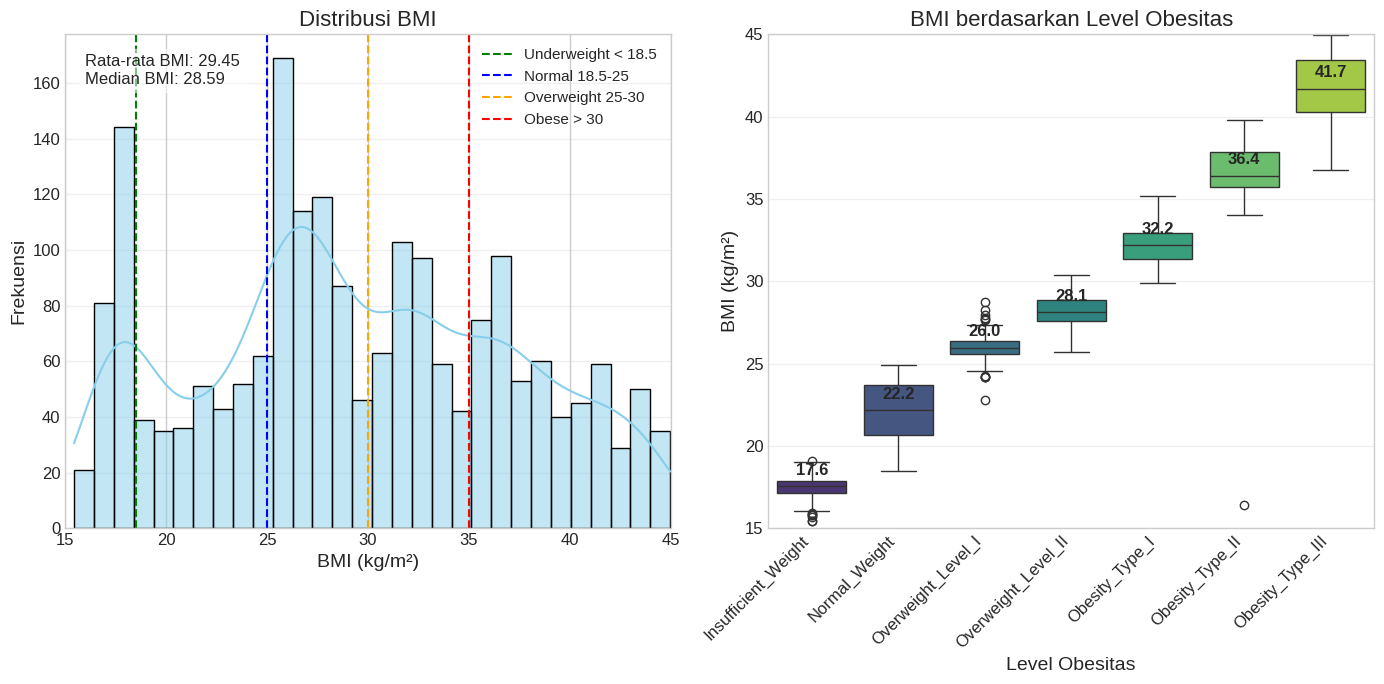


Statistik BMI berdasarkan Level Obesitas:
            NObeyesdad  count       mean     median        min         max
0  Insufficient_Weight    264  18.726913  17.547455   7.060457  153.690334
1        Normal_Weight    281  22.238438  22.160665   6.371475  109.991723
2       Obesity_Type_I    346  32.247779  32.192656  29.911958   35.171095
3      Obesity_Type_II    294  36.937216  36.416174  16.441485  121.320641
4     Obesity_Type_III    316  43.078468  41.946676  13.517826  145.711597
5   Overweight_Level_I    290  27.400556  25.977932   8.506533  150.152080
6  Overweight_Level_II    279  28.822865  28.149323  10.600142  141.621658


In [34]:
# 4. VISUALISASI BMI (BODY MASS INDEX)
# Pastikan kolom Height dan Weight bertipe numerik
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Hanya hitung BMI untuk baris yang memiliki nilai Height dan Weight valid
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Tampilkan info tentang data yang digunakan
print(f"Jumlah data yang valid untuk BMI: {df['BMI'].notna().sum()} dari {len(df)} total")
print("Statistik BMI:")
print(df['BMI'].describe())

# Filter data untuk visualisasi (hilangkan outlier)
# BMI normal biasanya berkisar 15-45
df_viz = df[(df['BMI'] > 15) & (df['BMI'] < 45)]
print(f"Jumlah data setelah filter outlier BMI: {len(df_viz)} dari {len(df)} total")

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(df_viz['BMI'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=18.5, color='green', linestyle='--', label='Underweight < 18.5')
plt.axvline(x=25, color='blue', linestyle='--', label='Normal 18.5-25')
plt.axvline(x=30, color='orange', linestyle='--', label='Overweight 25-30')
plt.axvline(x=35, color='red', linestyle='--', label='Obese > 30')
plt.title('Distribusi BMI', fontsize=16)
plt.xlabel('BMI (kg/m²)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Menambahkan batasan sumbu untuk kejelasan
plt.xlim(15, 45)

# Hitung statistik untuk ditampilkan
avg_bmi = df_viz['BMI'].mean()
median_bmi = df_viz['BMI'].median()
plt.text(16, plt.gca().get_ylim()[1]*0.9,
         f"Rata-rata BMI: {avg_bmi:.2f}\nMedian BMI: {median_bmi:.2f}",
         bbox=dict(facecolor='white', alpha=0.5))

plt.subplot(1, 2, 2)
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
         'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
         'Obesity_Type_III']

ax = sns.boxplot(x='NObeyesdad', y='BMI', data=df_viz, palette='viridis', order=order)

# Tambahkan label untuk median setiap kelompok
medians = df_viz.groupby('NObeyesdad')['BMI'].median().reset_index()
median_dict = dict(zip(medians['NObeyesdad'], medians['BMI']))

for i, cat in enumerate(order):
    if cat in median_dict:
        median_val = median_dict[cat]
        ax.text(i, median_val + 0.5, f"{median_val:.1f}", ha='center', va='bottom', fontweight='bold')

plt.title('BMI berdasarkan Level Obesitas', fontsize=16)
plt.xlabel('Level Obesitas', fontsize=14)
plt.ylabel('BMI (kg/m²)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(15, 45)  # Batasan sumbu y untuk kejelasan
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('bmi_obesitas.png', dpi=300, bbox_inches='tight')
plt.show()

# Tampilkan statistik BMI untuk setiap kategori obesitas
bmi_stats = df.groupby('NObeyesdad')['BMI'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
print("\nStatistik BMI berdasarkan Level Obesitas:")
print(bmi_stats)

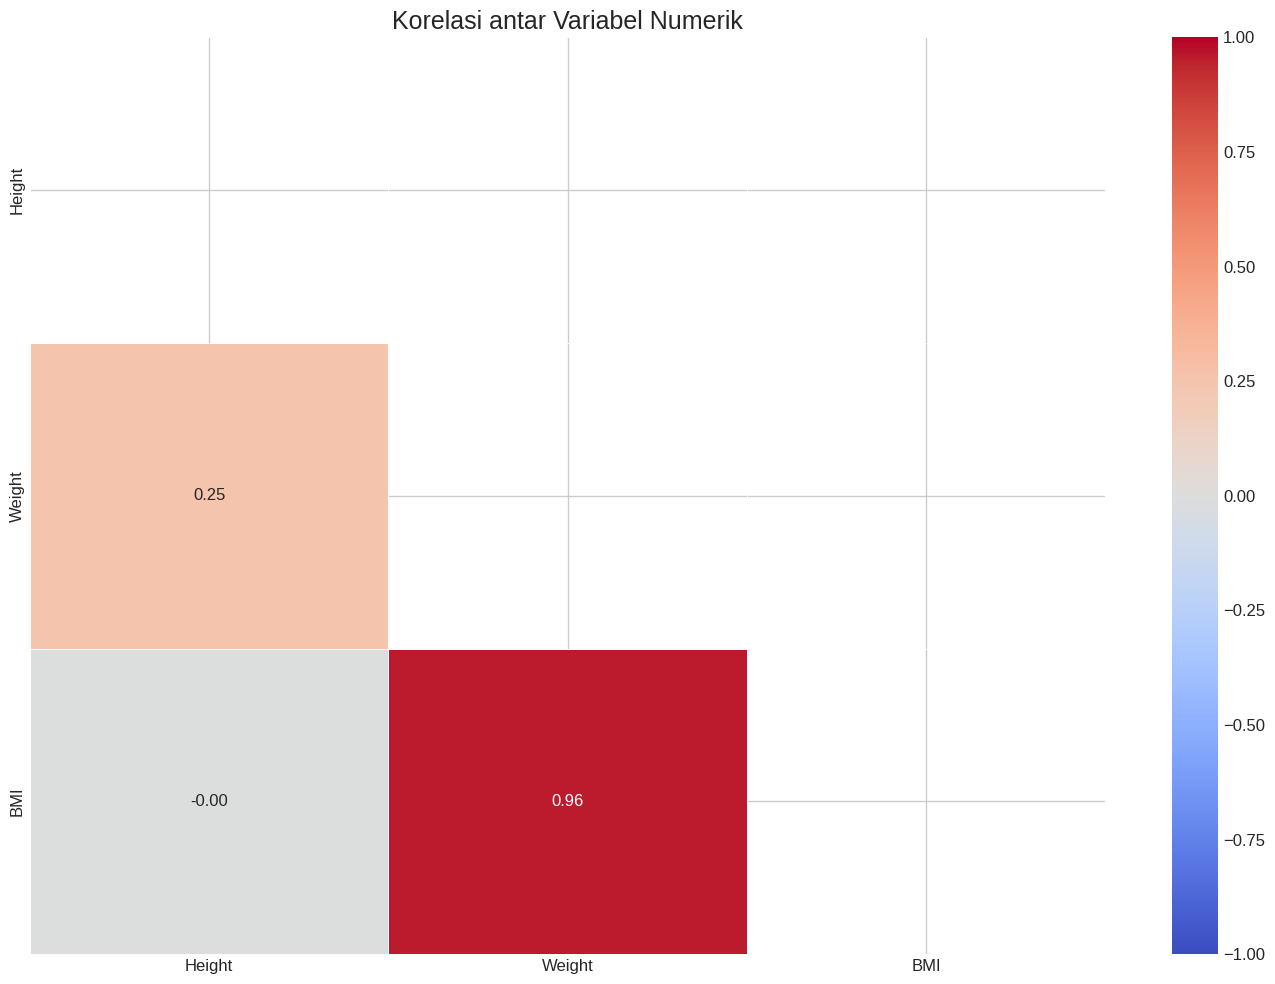

In [35]:
# 5. VISUALISASI HEATMAP KORELASI
# Memilih kolom numerik saja
numeric_df = df.select_dtypes(include=[np.number])
# Menambahkan kolom BMI jika belum ada
if 'BMI' not in numeric_df.columns:
    numeric_df['BMI'] = df['BMI']

plt.figure(figsize=(14, 10))
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask,
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasi antar Variabel Numerik', fontsize=18)
plt.tight_layout()
plt.savefig('korelasi_heatmap.png')
plt.show()

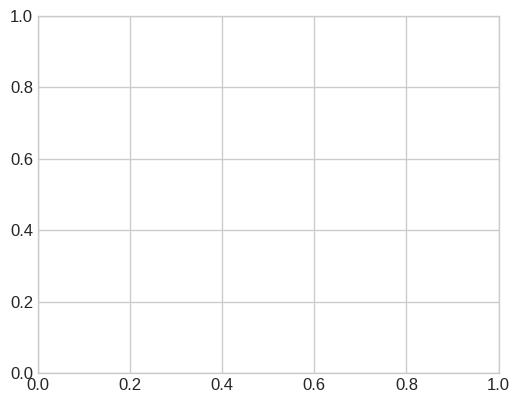

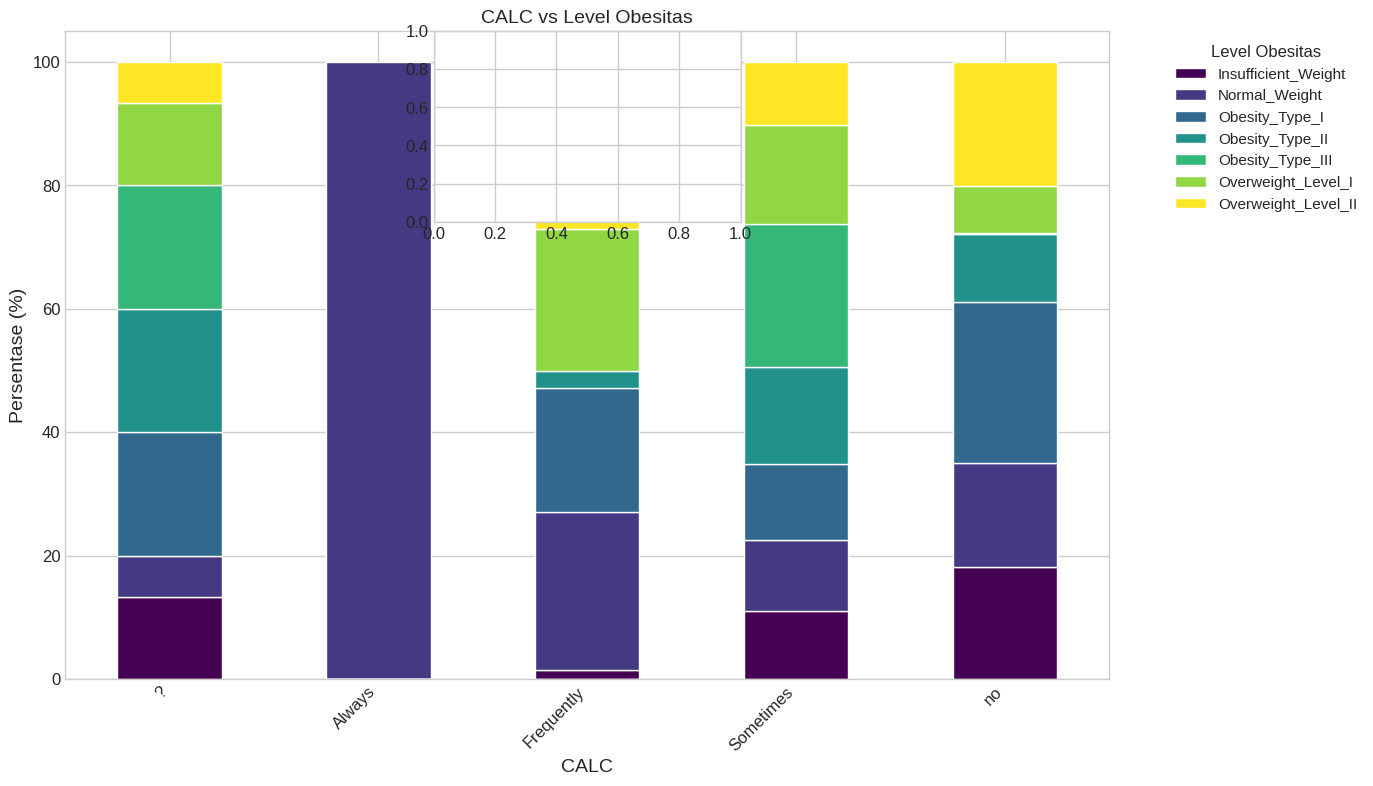

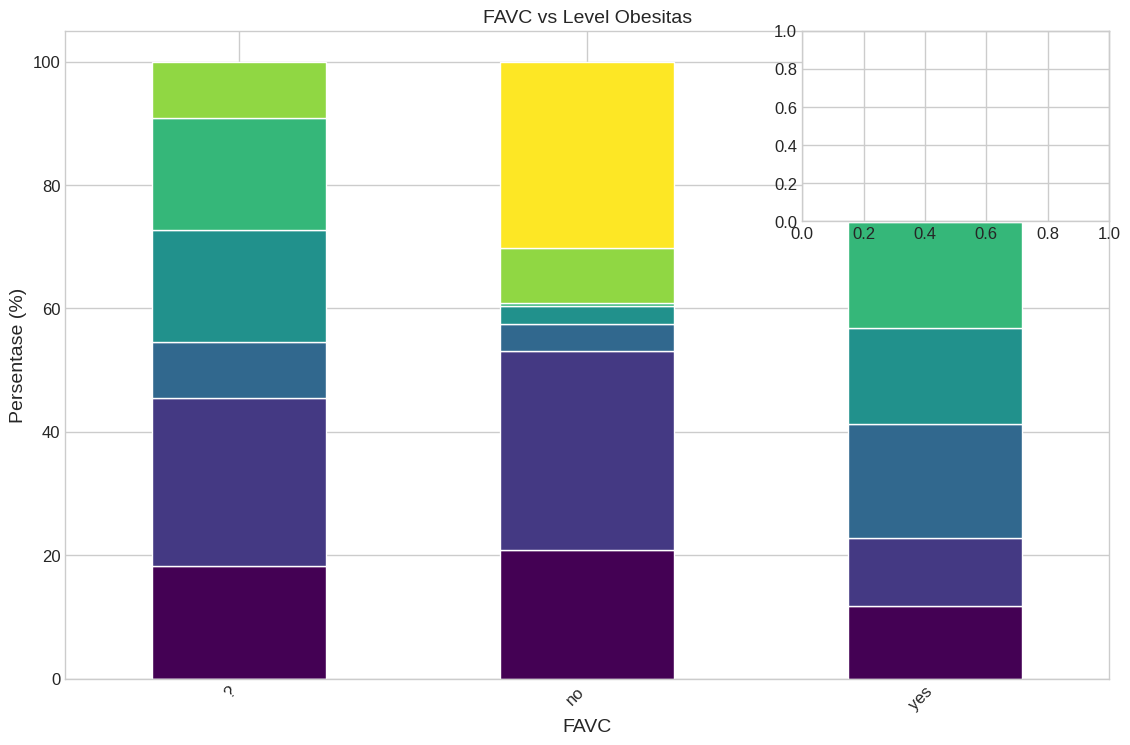

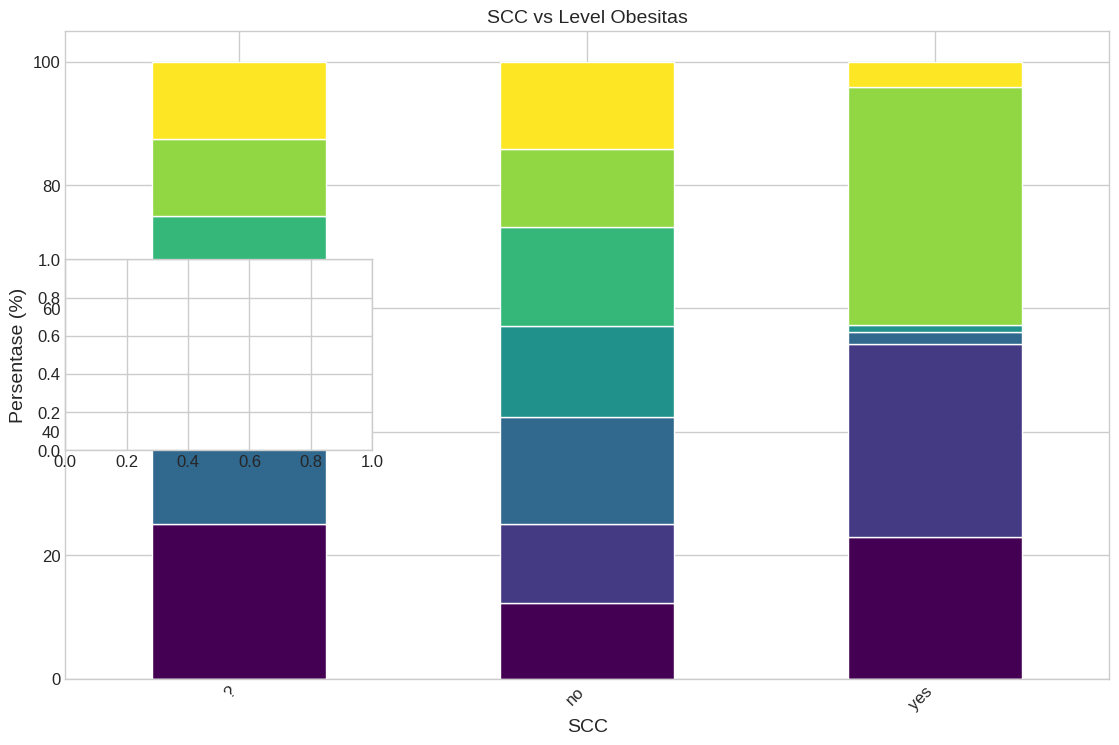

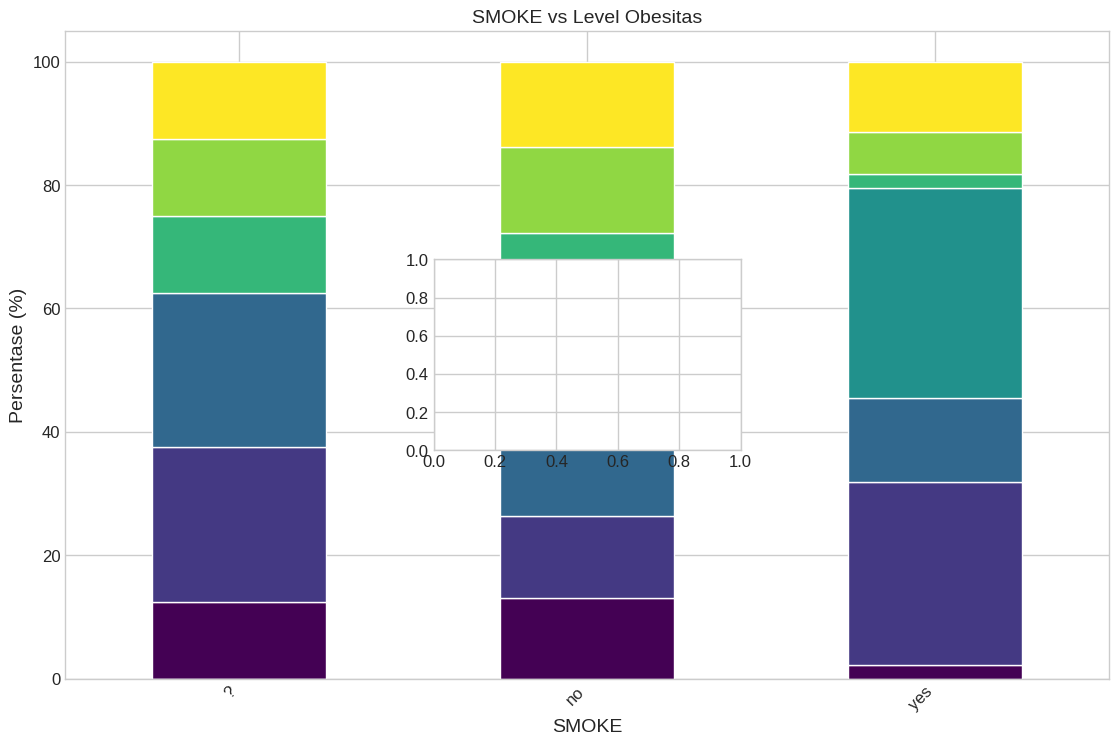

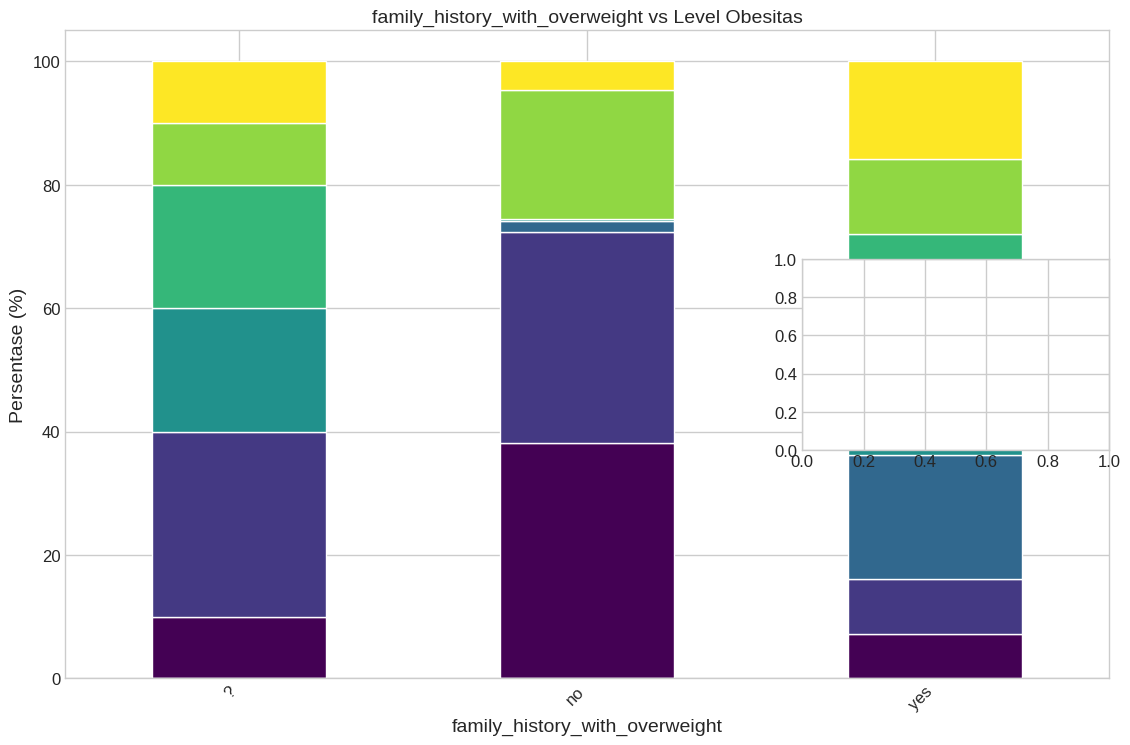

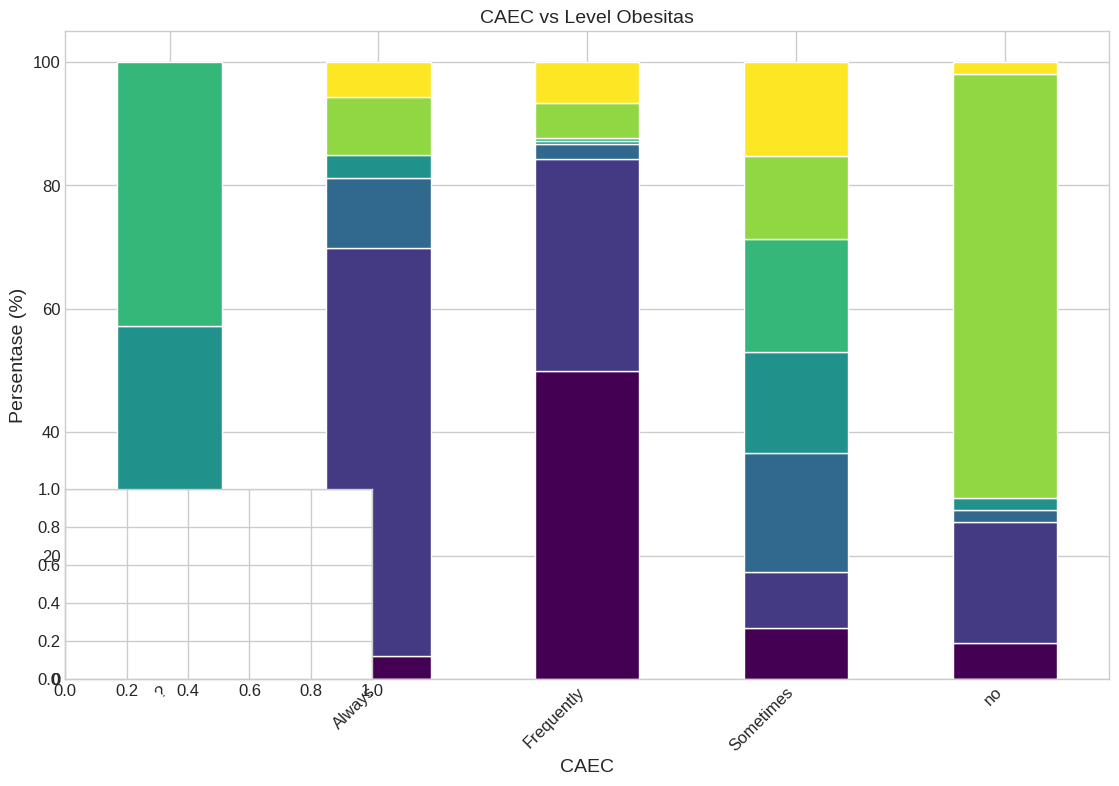

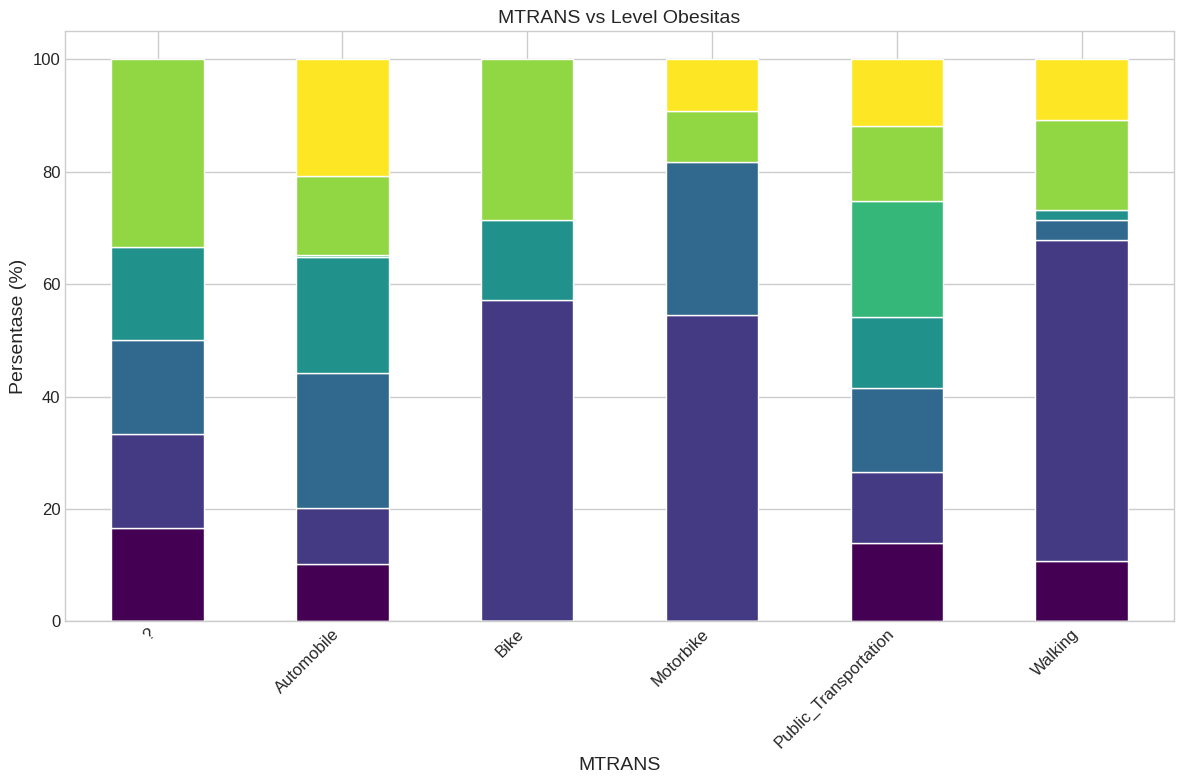

In [36]:
# 6. VISUALISASI FITUR KATEGORIKAL
categorical_cols = ['CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    cross_tab = pd.crosstab(df[col], df['NObeyesdad'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'{col} vs Level Obesitas', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=45, ha='right')
    if i == 1:
        plt.legend(title='Level Obesitas', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.legend([])
plt.tight_layout()
plt.savefig('kategorikal_features.png')
plt.show()

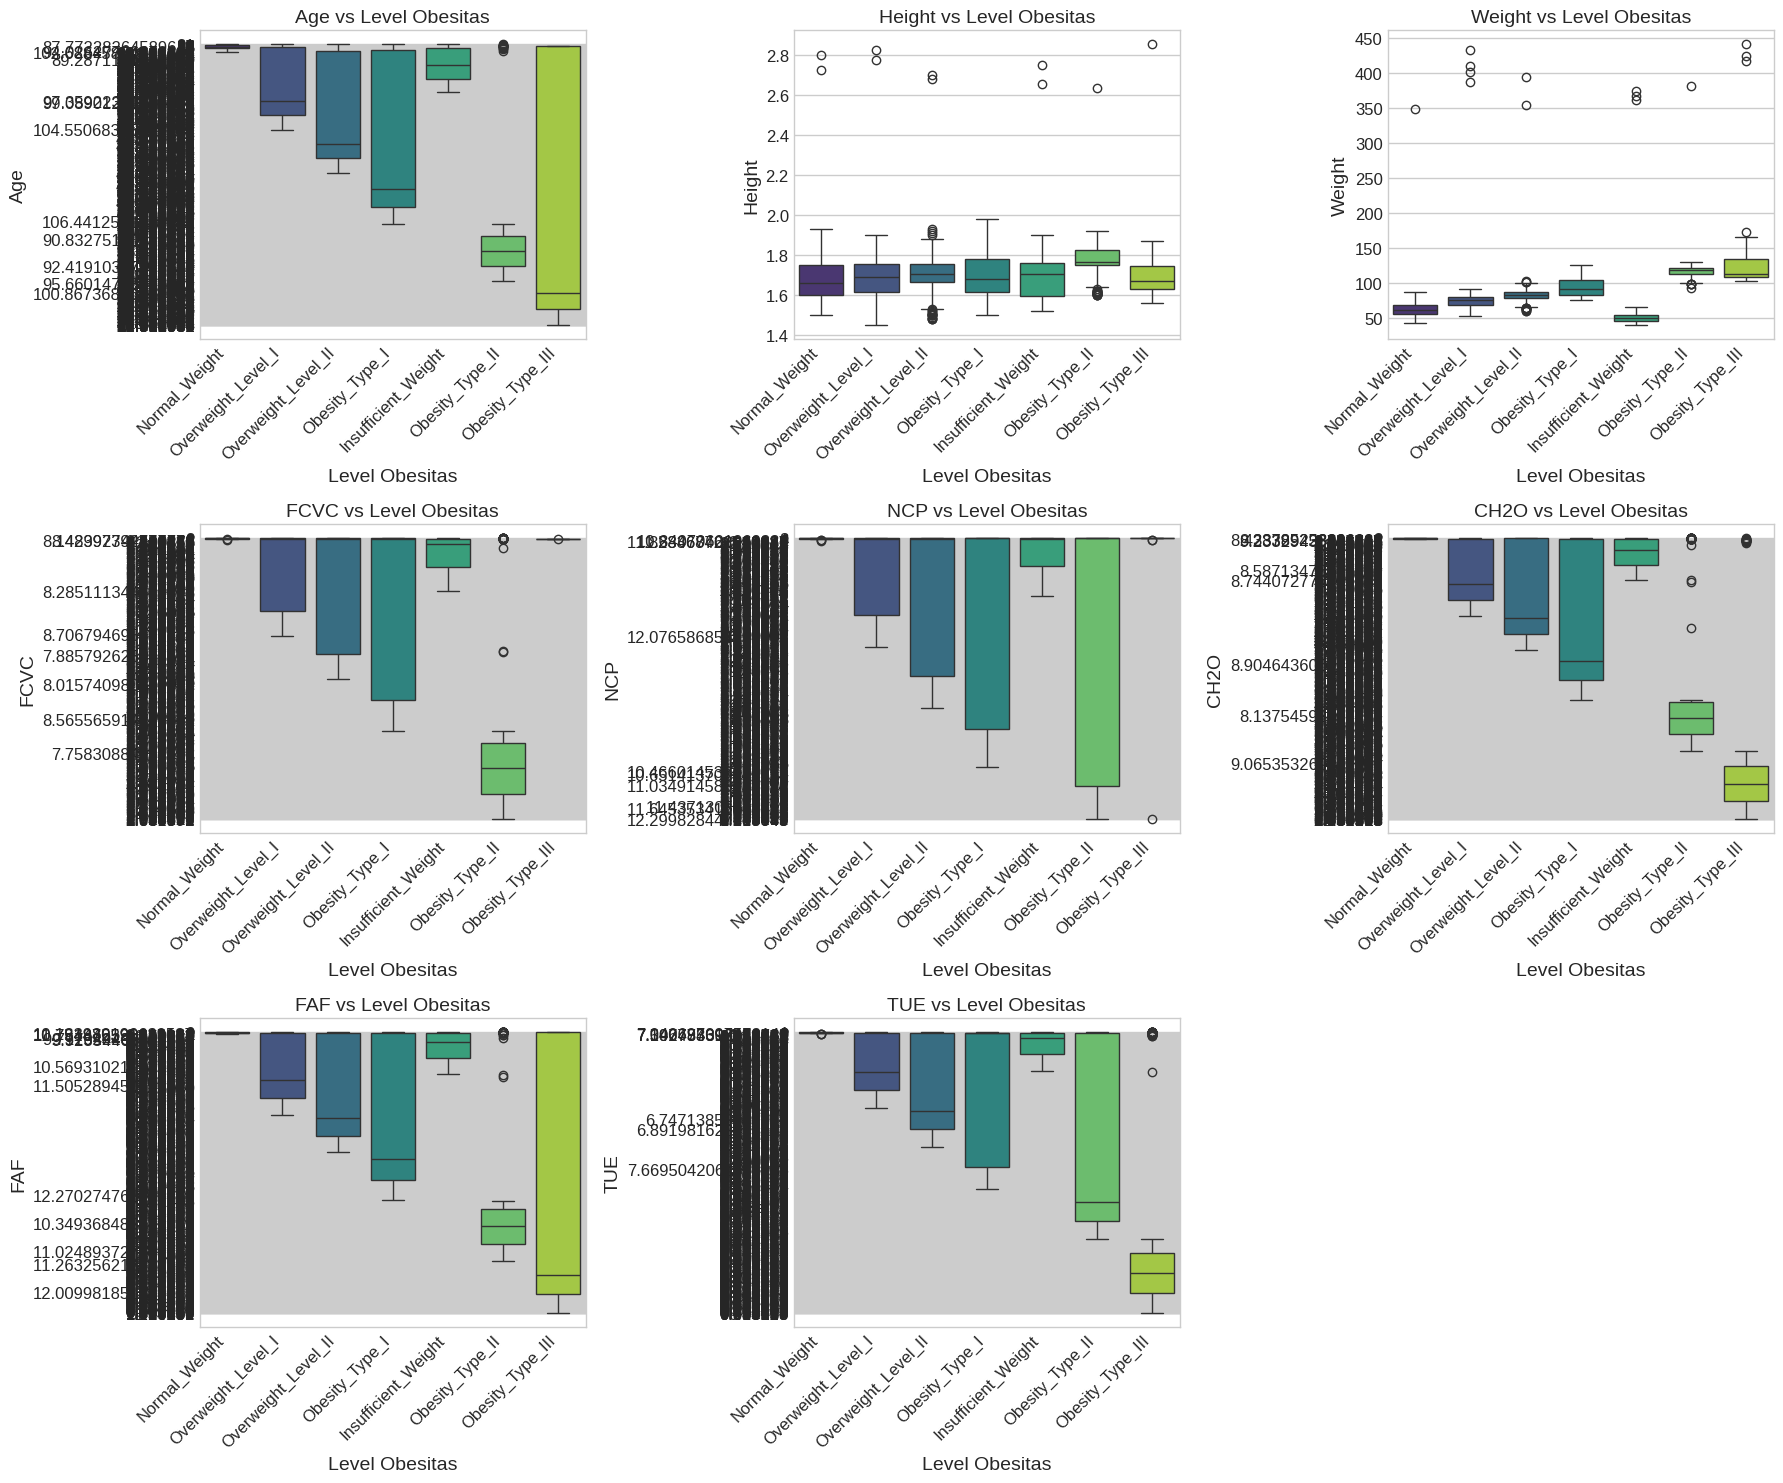

In [37]:
# 7. VISUALISASI FITUR NUMERIK
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(18, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='NObeyesdad', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs Level Obesitas', fontsize=14)
    plt.xlabel('Level Obesitas')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('numerik_features.png')
plt.show()

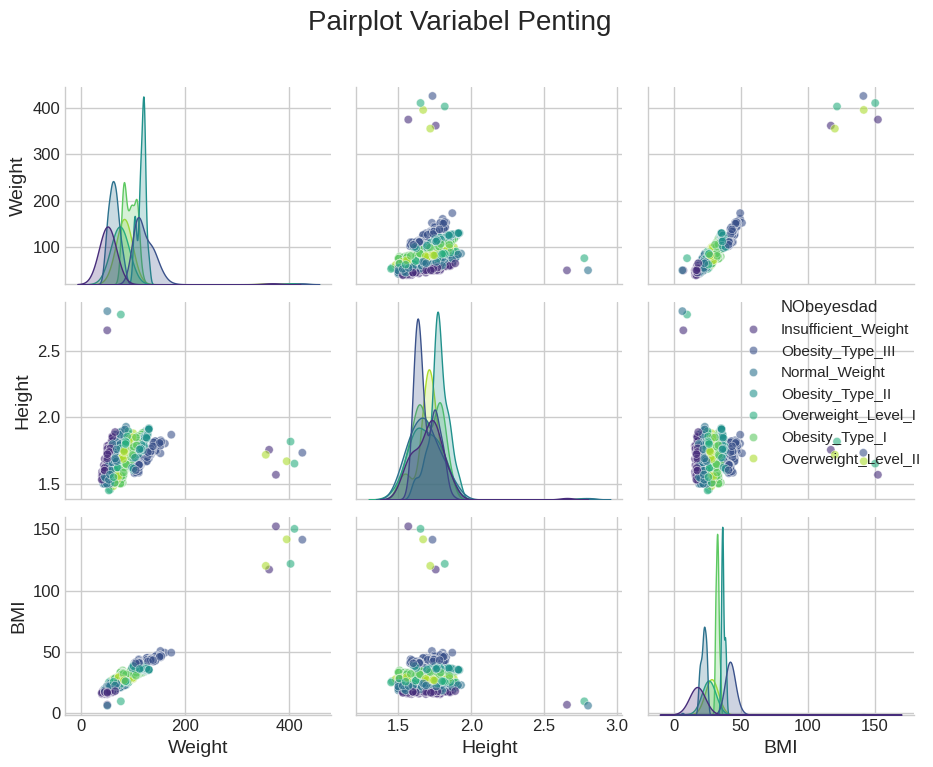

In [38]:
# 8. VISUALISASI PAIRPLOT UNTUK VARIABEL PENTING
# Memilih subset data untuk visualisasi lebih efisien
subset_df = df.sample(n=min(1000, len(df)), random_state=42)
# Memilih kolom yang paling relevan
important_cols = ['Age', 'Weight', 'Height', 'BMI', 'FCVC', 'FAF', 'NObeyesdad']
sns.pairplot(subset_df[important_cols], hue='NObeyesdad', palette='viridis',
             plot_kws={'alpha': 0.6}, diag_kind='kde', height=2.5)
plt.suptitle('Pairplot Variabel Penting', fontsize=20, y=1.02)
plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()

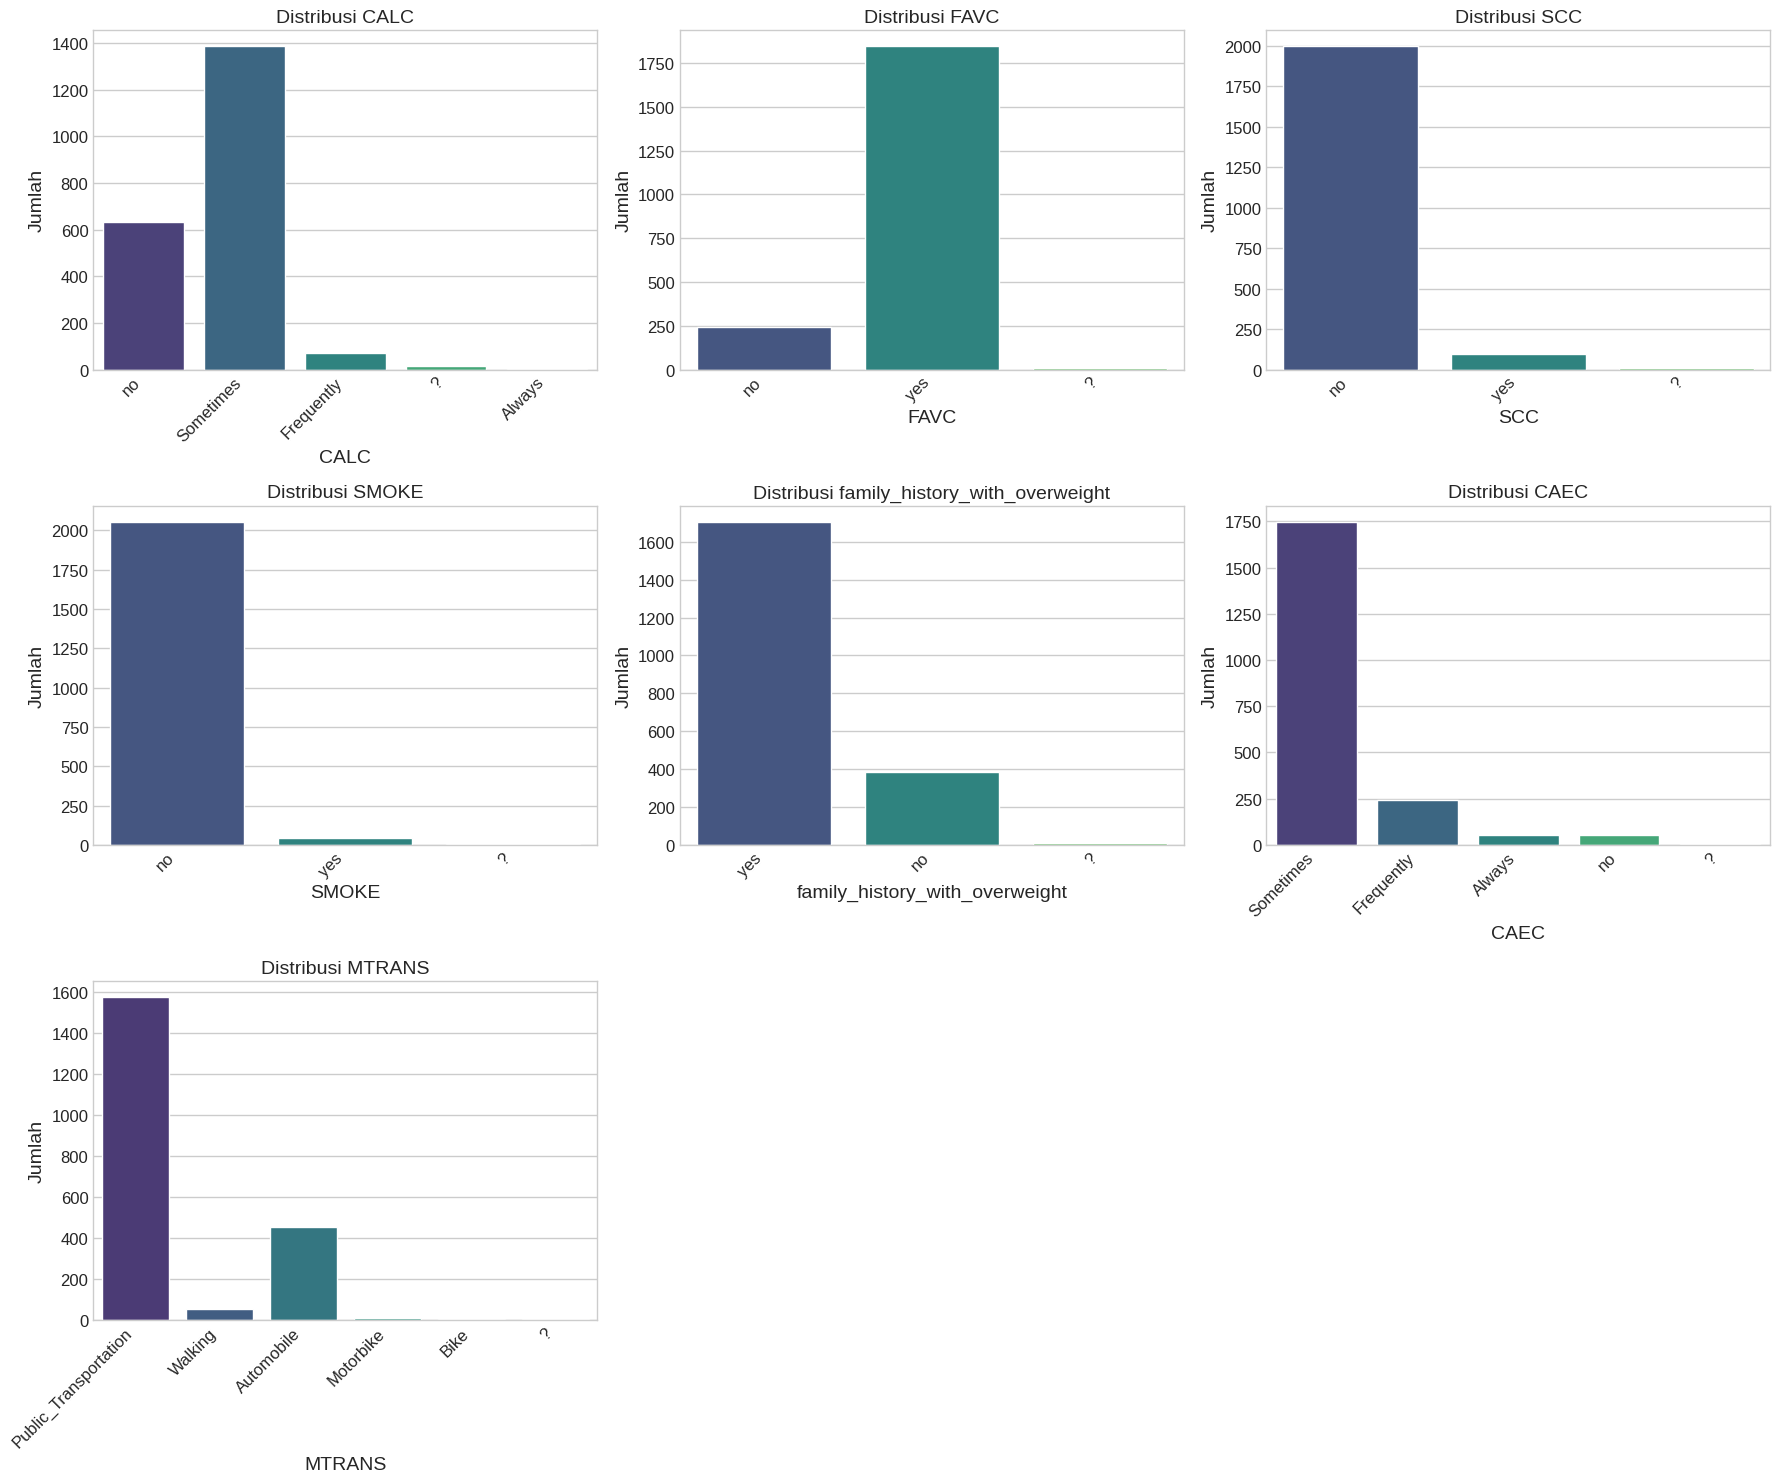

In [39]:
# 9. VISUALISASI COUNTPLOT UNTUK FITUR KATEGORIKAL
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('countplot_kategorikal.png')
plt.show()

[Text(0, 0, 'Insufficient_Weight'),
 Text(1, 0, 'Normal_Weight'),
 Text(2, 0, 'Obesity_Type_I'),
 Text(3, 0, 'Obesity_Type_II'),
 Text(4, 0, 'Obesity_Type_III'),
 Text(5, 0, 'Overweight_Level_I'),
 Text(6, 0, 'Overweight_Level_II')]

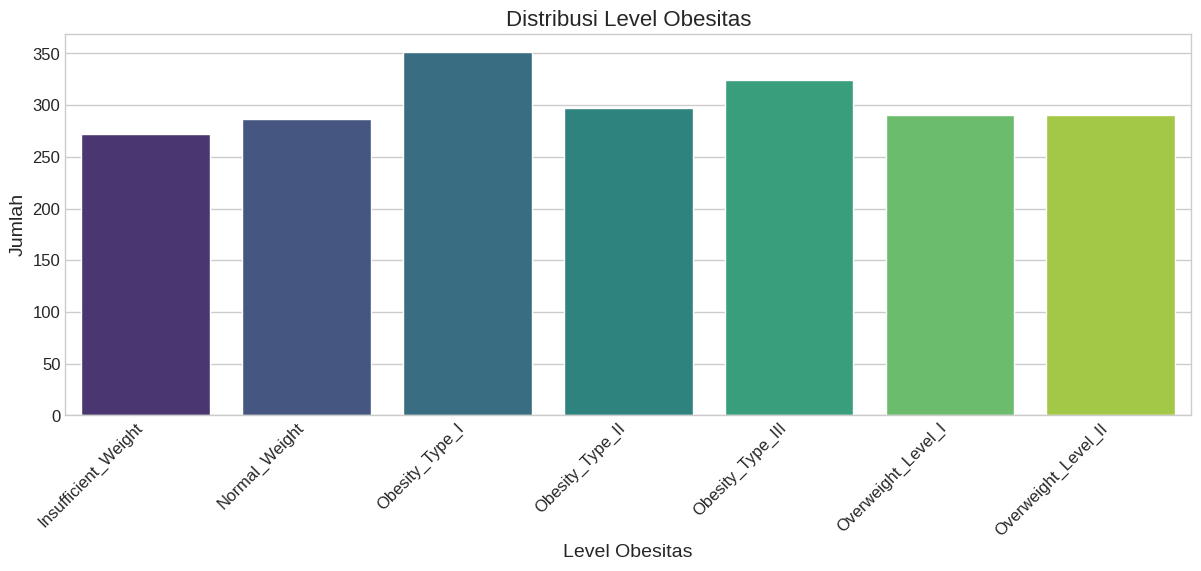

In [41]:
# 10. VISUALISASI DASHBOARD RINGKASAN
plt.figure(figsize=(20, 16))
gs = GridSpec(3, 3)

# Plot 1: Distribusi Kelas Target
ax1 = plt.subplot(gs[0, :2])
target_counts = df['NObeyesdad'].value_counts().sort_index()
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis', ax=ax1)
ax1.set_title('Distribusi Level Obesitas', fontsize=16)
ax1.set_xlabel('Level Obesitas')
ax1.set_ylabel('Jumlah')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

Text(0, 0.5, '')

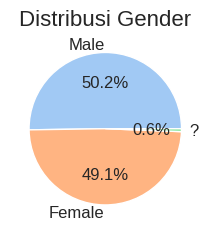

In [42]:
# Plot 2: Gender vs Obesitas
ax2 = plt.subplot(gs[0, 2])
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax2, colors=sns.color_palette('pastel'))
ax2.set_title('Distribusi Gender', fontsize=16)
ax2.set_ylabel('')

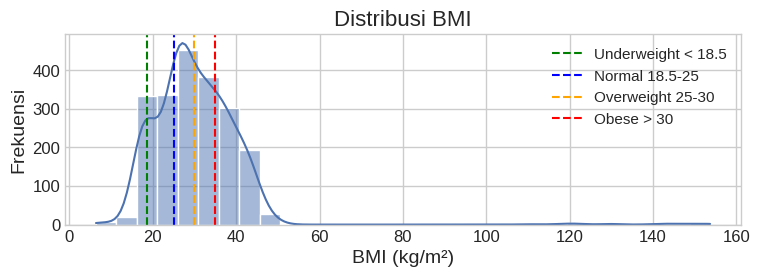

In [43]:
# Plot 3: BMI Distribution
ax3 = plt.subplot(gs[1, :2])
sns.histplot(df['BMI'], kde=True, bins=30, ax=ax3)
ax3.axvline(x=18.5, color='green', linestyle='--', label='Underweight < 18.5')
ax3.axvline(x=25, color='blue', linestyle='--', label='Normal 18.5-25')
ax3.axvline(x=30, color='orange', linestyle='--', label='Overweight 25-30')
ax3.axvline(x=35, color='red', linestyle='--', label='Obese > 30')
ax3.set_title('Distribusi BMI', fontsize=16)
ax3.set_xlabel('BMI (kg/m²)')
ax3.set_ylabel('Frekuensi')
ax3.legend()

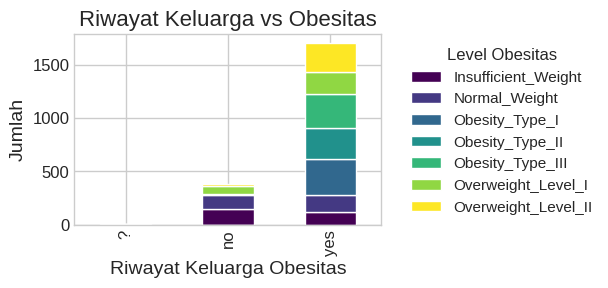

In [44]:
# Plot 4: Family History
ax4 = plt.subplot(gs[1, 2])
family_history = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])
family_history.plot(kind='bar', stacked=True, colormap='viridis', ax=ax4)
ax4.set_title('Riwayat Keluarga vs Obesitas', fontsize=16)
ax4.set_xlabel('Riwayat Keluarga Obesitas')
ax4.set_ylabel('Jumlah')
ax4.legend(title='Level Obesitas', bbox_to_anchor=(1.05, 1), loc='upper left')

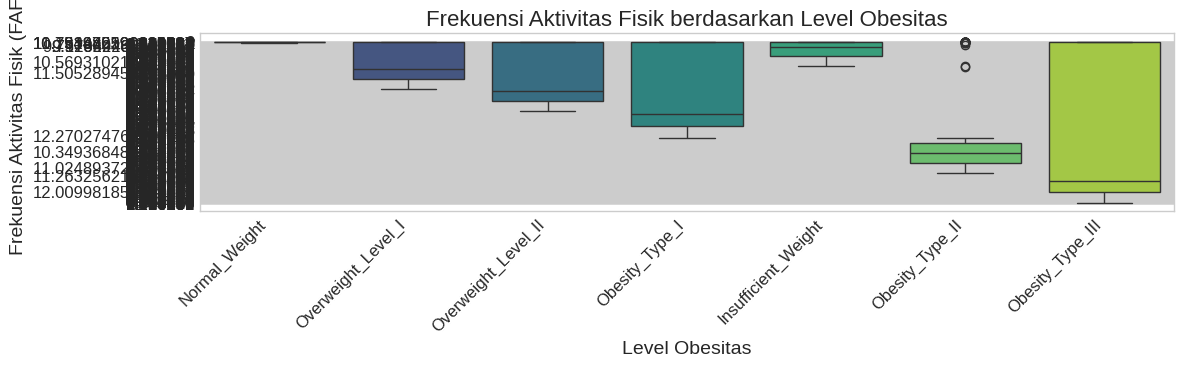

In [45]:
# Plot 5: Physical Activity
ax5 = plt.subplot(gs[2, :])
sns.boxplot(x='NObeyesdad', y='FAF', data=df, palette='viridis', ax=ax5)
ax5.set_title('Frekuensi Aktivitas Fisik berdasarkan Level Obesitas', fontsize=16)
ax5.set_xlabel('Level Obesitas')
ax5.set_ylabel('Frekuensi Aktivitas Fisik (FAF)')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('dashboard_ringkasan.png')
plt.show()

ANALISIS KUALITAS DATA PADA DATASET OBESITAS

1. PEMERIKSAAN MISSING VALUES
--------------------------------------------------
                                Jumlah Missing  Persentase (%)
BMI                                         41        1.942207
Age                                         22        1.042160
Height                                      22        1.042160
NCP                                         22        1.042160
Weight                                      19        0.900047
FAF                                         19        0.900047
FCVC                                        18        0.852676
CH2O                                        15        0.710564
TUE                                         15        0.710564
family_history_with_overweight              13        0.615822
CAEC                                        11        0.521080
FAVC                                        11        0.521080
SCC                                         10        

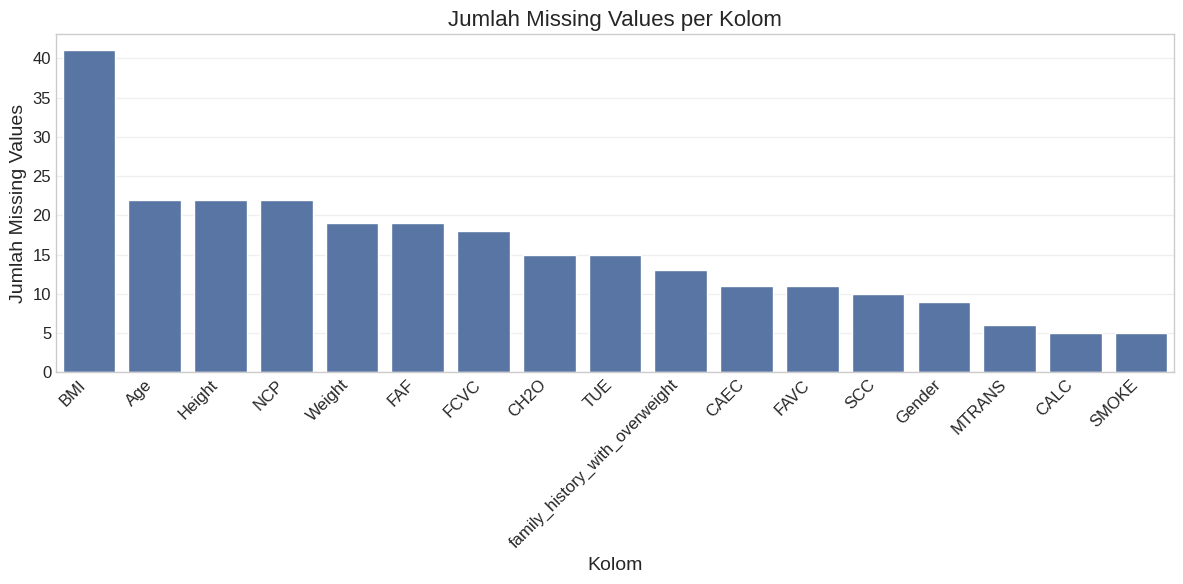

In [46]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats

# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

# Pastikan kolom numerik bertipe numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hitung BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

print("="*80)
print("ANALISIS KUALITAS DATA PADA DATASET OBESITAS")
print("="*80)

# 1. PEMERIKSAAN MISSING VALUES
print("\n1. PEMERIKSAAN MISSING VALUES")
print("-"*50)

# Jumlah missing values per kolom
missing_values = df.isnull().sum()
missing_percentages = 100 * missing_values / len(df)
missing_data = pd.concat([missing_values, missing_percentages], axis=1)
missing_data.columns = ['Jumlah Missing', 'Persentase (%)']

# Filter hanya kolom yang memiliki missing values
missing_data = missing_data[missing_data['Jumlah Missing'] > 0].sort_values('Persentase (%)', ascending=False)
print(missing_data)

# Visualisasi missing values
plt.figure(figsize=(12, 6))
plt.title('Jumlah Missing Values per Kolom', fontsize=16)
if missing_data.shape[0] > 0:
    sns.barplot(x=missing_data.index, y='Jumlah Missing', data=missing_data)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Jumlah Missing Values')
    plt.xlabel('Kolom')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Tidak ada missing values pada dataset")

In [47]:
# 2. PEMERIKSAAN UNIQUE VALUES
print("\n2. PEMERIKSAAN UNIQUE VALUES")
print("-"*50)

# Jumlah nilai unik per kolom
unique_counts = df.nunique()
print("Jumlah nilai unik per kolom:")
print(unique_counts)

# Tampilkan nilai unik untuk kolom kategori
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print("\nNilai unik untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")
    value_counts = df[col].value_counts()
    print(value_counts)
    print(f"Persentase: \n{100 * value_counts / len(df)}")


2. PEMERIKSAAN UNIQUE VALUES
--------------------------------------------------
Jumlah nilai unik per kolom:
Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
BMI                               1935
dtype: int64

Nilai unik untuk kolom kategorikal:

Gender: ['Female' 'Male' '?' nan]
Gender
Male      1056
Female    1033
?           13
Name: count, dtype: int64
Persentase: 
Gender
Male 

In [49]:
# 3. PEMERIKSAAN DATA DUPLIKAT
print("\n3. PEMERIKSAAN DATA DUPLIKAT")
print("-"*50)

# Jumlah data duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates} ({100 * duplicates / len(df):.2f}%)")

if duplicates > 0:
    # Lihat beberapa data duplikat
    print("\nContoh data duplikat:")
    print(df[df.duplicated(keep='first')].head())

    # Lihat distribusi duplikat berdasarkan target class
    dup_by_class = df[df.duplicated(keep=False)]['NObeyesdad'].value_counts()
    print("\nDistribusi data duplikat berdasarkan kelas target:")
    print(dup_by_class)

    # BAGIAN YANG DIGANTI:
    print("Persentase:")
    for idx, val in dup_by_class.items():
        print(f"{idx}: {100 * val / duplicates:.2f}%")


3. PEMERIKSAAN DATA DUPLIKAT
--------------------------------------------------
Jumlah data duplikat: 18 (0.85%)

Contoh data duplikat:
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   

    family_history_with_overweight  FAF  TUE        CAEC  \
98                              no  0.0  0.0  Frequently   
174                             no  1.0  0.0          no   
179                             no  1.0  0.0          no   
184                             no  1.0  0.0          no   
309                             no  0.0  1.0   Sometimes   

                    M


4. PEMERIKSAAN KESEIMBANGAN DATA (CLASS BALANCE)
--------------------------------------------------
Distribusi kelas target:
                     Jumlah  Persentase (%)
NObeyesdad                                 
Obesity_Type_I          351       16.627191
Obesity_Type_III        324       15.348176
Obesity_Type_II         297       14.069162
Overweight_Level_I      290       13.737565
Overweight_Level_II     290       13.737565
Normal_Weight           287       13.595452
Insufficient_Weight     272       12.884889


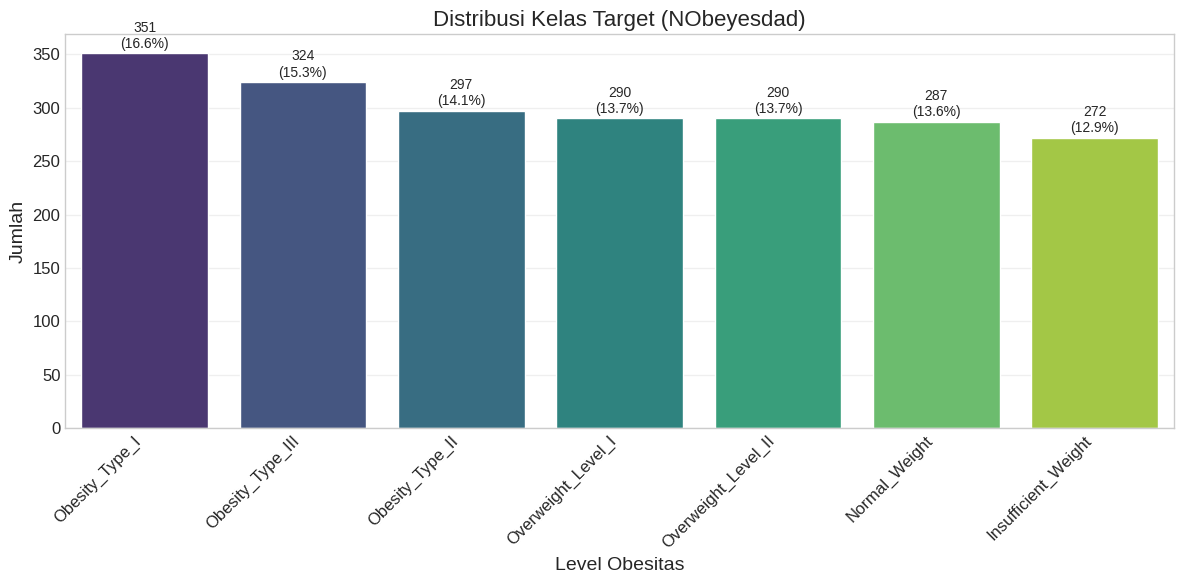

In [50]:
# 4. PEMERIKSAAN KESEIMBANGAN DATA (CLASS BALANCE)
print("\n4. PEMERIKSAAN KESEIMBANGAN DATA (CLASS BALANCE)")
print("-"*50)

# Distribusi kelas target
class_counts = df['NObeyesdad'].value_counts()
class_percentages = 100 * class_counts / len(df)

print("Distribusi kelas target:")
balance_df = pd.DataFrame({
    'Jumlah': class_counts,
    'Persentase (%)': class_percentages
})
print(balance_df)

# Visualisasi keseimbangan kelas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=16)
plt.xlabel('Level Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Tambahkan label pada setiap bar
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 5, f"{v}\n({class_percentages[i]:.1f}%)", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('class_balance.png', dpi=300, bbox_inches='tight')
plt.show()


5. DETEKSI OUTLIER MENGGUNAKAN BOXPLOT
--------------------------------------------------
Statistik outlier untuk kolom numerik:
   column  n_outliers  outlier_percentage        min         max  lower_bound  \
4     NCP         592           28.043581   1.000000   12.299828     2.188528   
0     Age         179            8.479394  14.000000  106.441252    10.888142   
2  Weight          15            0.710564  39.000000  441.131078     2.916396   
8     BMI          15            0.710564   6.371475  153.690334     6.673689   
6     FAF          13            0.615822   0.000000   12.270275    -2.202895   
1  Height          10            0.473709   1.450000    2.853986     1.420000   
3    FCVC           8            0.378967   1.000000    8.706795     0.500000   
5    CH2O           8            0.378967   1.000000    9.233294     0.201098   
7     TUE           7            0.331596   0.000000    7.669504    -1.500000   

   upper_bound  
4     3.486884  
0    35.067115  
2   171.

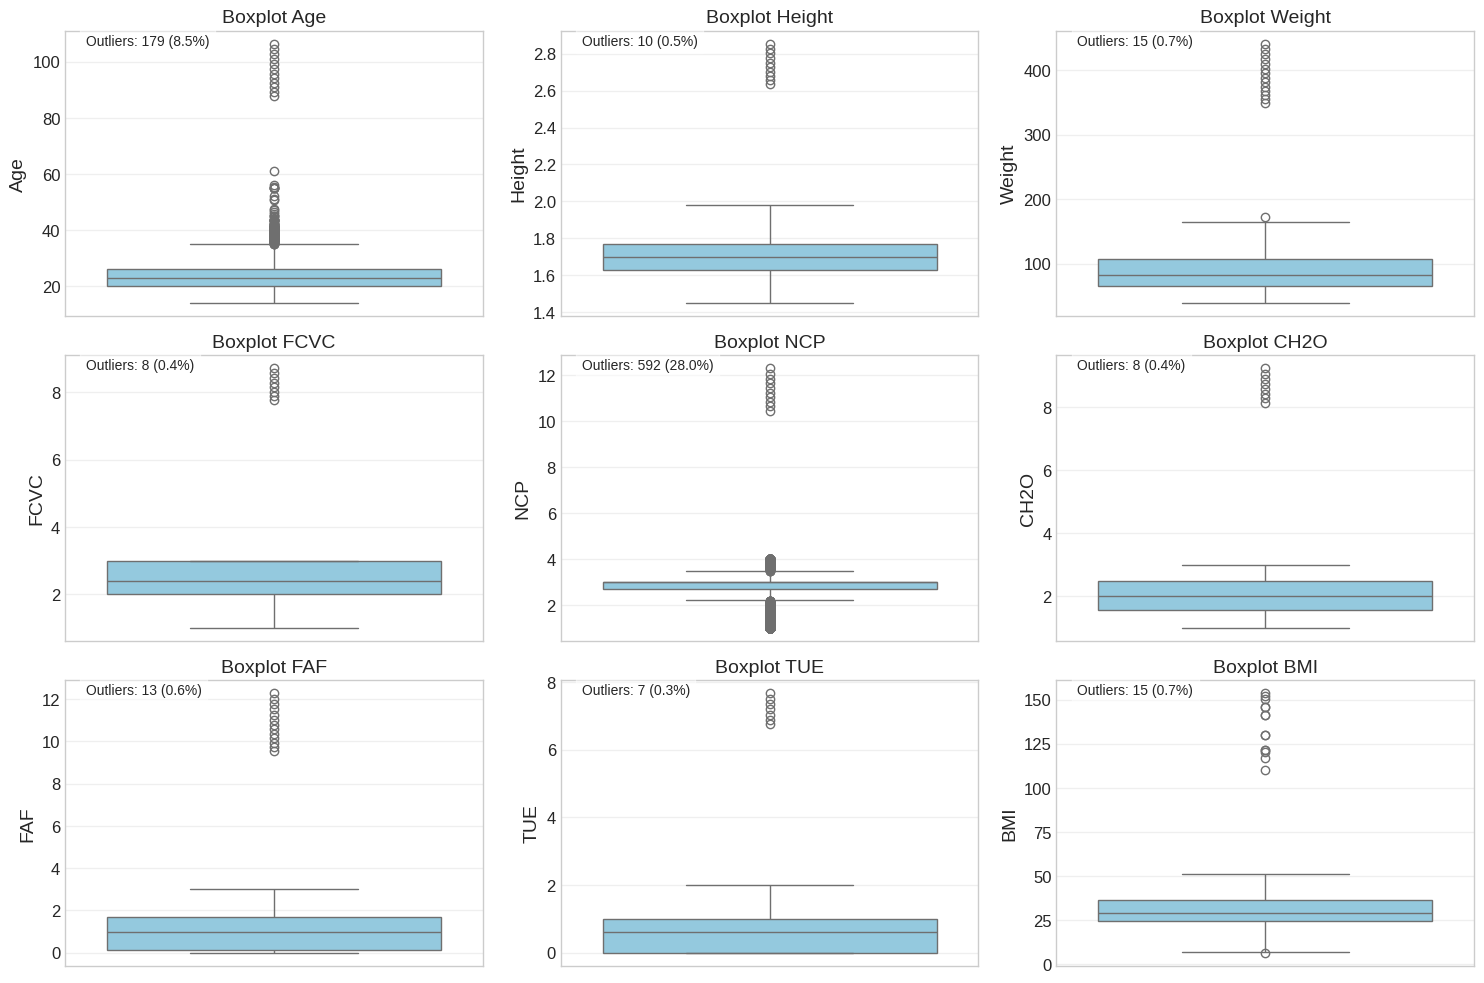

In [51]:
# 5. DETEKSI OUTLIER MENGGUNAKAN BOXPLOT
print("\n5. DETEKSI OUTLIER MENGGUNAKAN BOXPLOT")
print("-"*50)

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = 100 * len(outliers) / len(df)

    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers': len(outliers),
        'outlier_percentage': outlier_percentage,
        'min': df[column].min(),
        'max': df[column].max()
    }

# Kolom numerik untuk deteksi outlier
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Deteksi outlier untuk setiap kolom numerik
outlier_stats = []
for col in numeric_cols:
    if df[col].notna().sum() > 0:  # Skip kolom dengan semua nilai null
        outlier_stats.append(detect_outliers(df, col))

# Tampilkan statistik outlier
outlier_df = pd.DataFrame(outlier_stats)
outlier_df = outlier_df[['column', 'n_outliers', 'outlier_percentage', 'min', 'max', 'lower_bound', 'upper_bound']]
outlier_df = outlier_df.sort_values('outlier_percentage', ascending=False)
print("Statistik outlier untuk kolom numerik:")
print(outlier_df)

# Visualisasi outlier menggunakan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    if df[col].notna().sum() > 0:  # Skip kolom dengan semua nilai null
        plt.subplot(3, 3, i)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Boxplot {col}', fontsize=14)
        plt.ylabel(col)
        plt.grid(axis='y', alpha=0.3)

        # Tambahkan informasi outlier
        outlier_info = outlier_df[outlier_df['column'] == col].iloc[0]
        plt.text(0.05, 0.95, f"Outliers: {outlier_info['n_outliers']} ({outlier_info['outlier_percentage']:.1f}%)",
                 transform=plt.gca().transAxes, fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


6. BOXPLOT OUTLIER BERDASARKAN KELAS TARGET
--------------------------------------------------


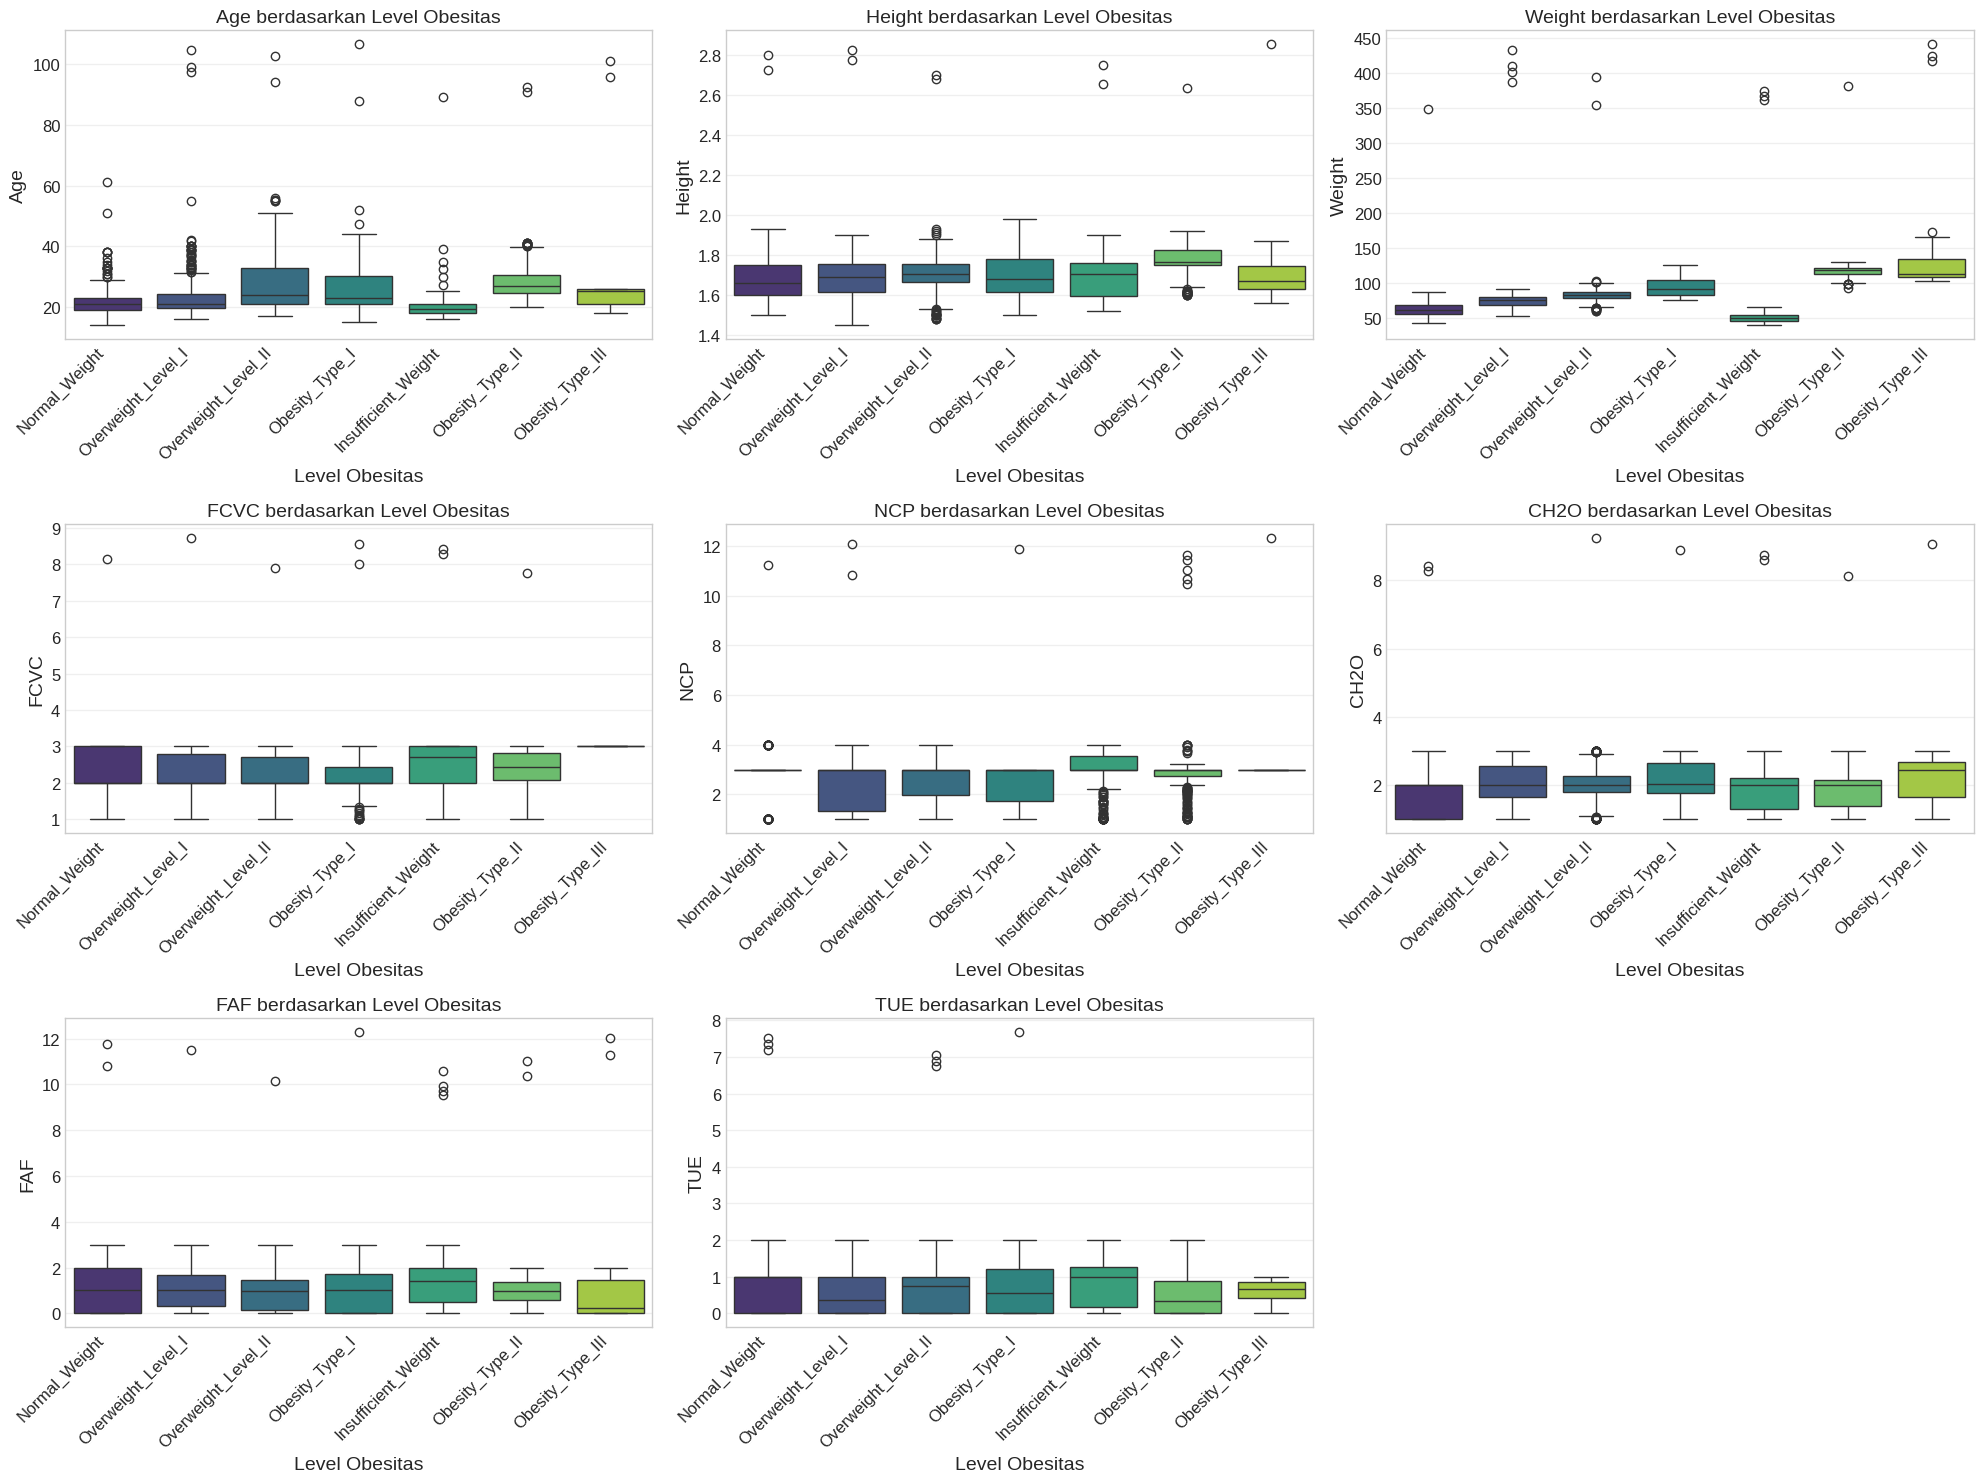

In [52]:
# 6. BOXPLOT OUTLIER BERDASARKAN KELAS TARGET
print("\n6. BOXPLOT OUTLIER BERDASARKAN KELAS TARGET")
print("-"*50)

# Visualisasi boxplot untuk setiap fitur numerik berdasarkan kelas target
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    if col != 'BMI' and df[col].notna().sum() > 0:  # Skip BMI dan kolom dengan semua nilai null
        plt.subplot(3, 3, i)
        sns.boxplot(x='NObeyesdad', y=col, data=df, palette='viridis')
        plt.title(f'{col} berdasarkan Level Obesitas', fontsize=14)
        plt.xlabel('Level Obesitas')
        plt.ylabel(col)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_by_class.png', dpi=300, bbox_inches='tight')
plt.show()


7. TAMBAHAN: VISUALISASI KORELASI HEATMAP
--------------------------------------------------


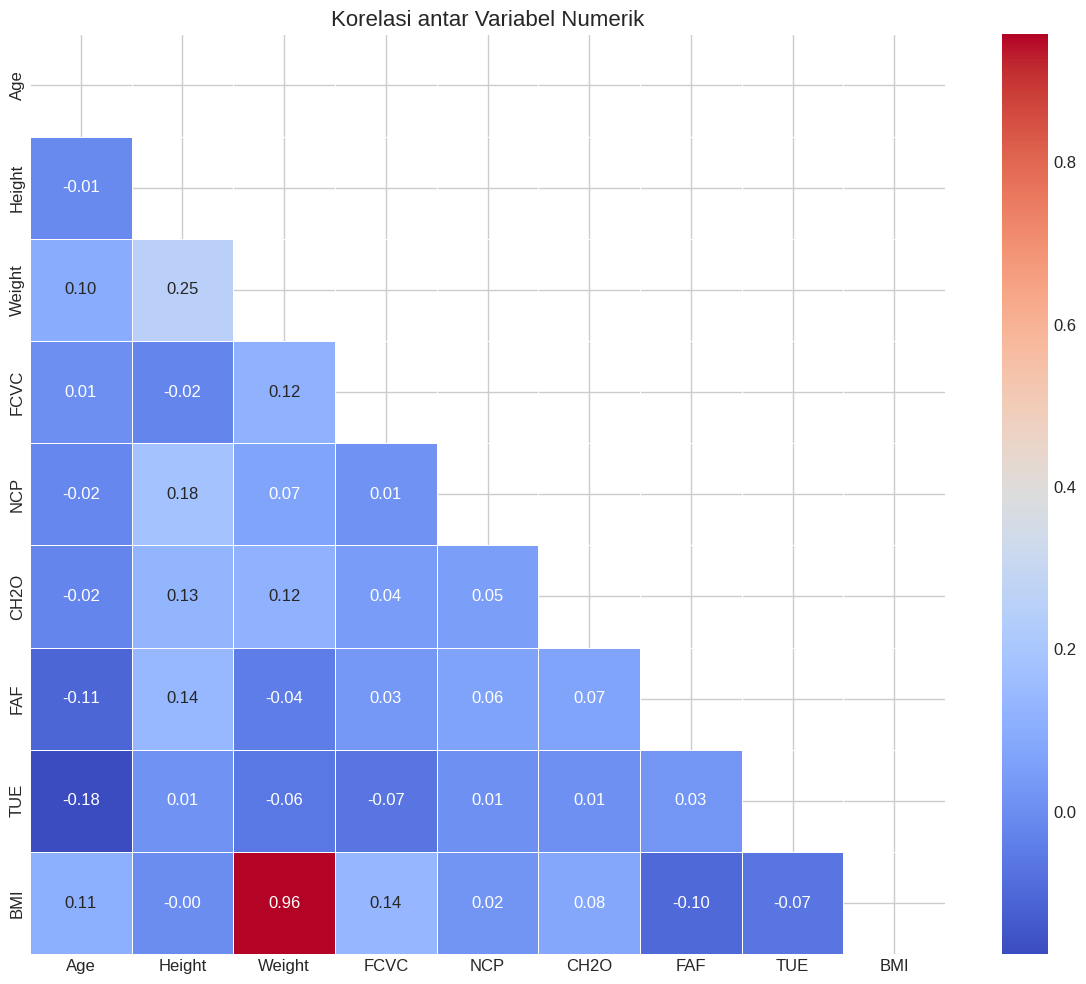

In [53]:
# 7. TAMBAHAN: VISUALISASI KORELASI HEATMAP
print("\n7. TAMBAHAN: VISUALISASI KORELASI HEATMAP")
print("-"*50)

# Hanya kolom numerik
numeric_df = df[numeric_cols].copy()
correlation = numeric_df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, mask=mask)
plt.title('Korelasi antar Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
# Rangkuman Analisis Kualitas Data
print("\nRANGKUMAN ANALISIS KUALITAS DATA")
print("="*80)
print(f"1. Total baris data: {len(df)}")
print(f"2. Total kolom: {len(df.columns)}")
print(f"3. Missing values: {missing_values.sum()} ({100 * missing_values.sum() / (len(df) * len(df.columns)):.2f}%)")
print(f"4. Duplikat: {duplicates} ({100 * duplicates / len(df):.2f}%)")
print(f"5. Keseimbangan kelas: Min {class_percentages.min():.1f}%, Max {class_percentages.max():.1f}%, Std {class_percentages.std():.1f}%")
print(f"6. Kolom dengan persentase outlier tertinggi: {outlier_df.iloc[0]['column']} ({outlier_df.iloc[0]['outlier_percentage']:.1f}%)")


RANGKUMAN ANALISIS KUALITAS DATA
1. Total baris data: 2111
2. Total kolom: 18
3. Missing values: 263 (0.69%)
4. Duplikat: 18 (0.85%)
5. Keseimbangan kelas: Min 12.9%, Max 16.6%, Std 1.3%
6. Kolom dengan persentase outlier tertinggi: NCP (28.0%)


In [59]:
from IPython.display import Markdown

# Data dummy agar bisa diganti sesuai hasil analisis kamu
baris = df.shape[0]
kolom = df.shape[1]
persen_duplikat = 100 * duplicates / len(df)
kelas_terendah = class_percentages.min()
kelas_tertinggi = class_percentages.max()
kolom_outlier_tertinggi = outlier_df.iloc[0]['column']
persentase_outlier_tertinggi = outlier_df.iloc[0]['outlier_percentage']

markdown_text = f"""
## 📊 KESIMPULAN DARI HASIL ANALISIS DATA
---

### 🔍 Rangkuman Eksplorasi Data (EDA):
- Dataset terdiri dari **{baris}** baris dan **{kolom}** kolom.
- Dataset berisi kombinasi kolom **numerik** dan **kategorikal**.
- Tidak ditemukan nilai **NULL/missing value** pada dataset awal sebelum perhitungan BMI.
- Distribusi kelas target (`NObeyesdad`) menunjukkan bahwa:
  - **Obesity_Type_I**, **Obesity_Type_II**, dan **Normal_Weight** memiliki jumlah tertinggi.
  - **Insufficient_Weight** dan **Obesity_Type_III** memiliki jumlah terendah.
  - Hal ini menandakan adanya **ketidakseimbangan kelas**.
- Visualisasi menunjukkan bahwa **distribusi BMI** bervariasi antar level obesitas, sesuai dengan definisi BMI.
- Terdapat **korelasi positif** yang kuat antara **Weight** dan **Height**.
- Beberapa fitur kategorikal seperti `family_history_with_overweight`, `CALC`, dan `CAEC` menunjukkan distribusi yang berbeda terhadap level obesitas.
- Aktivitas fisik (`FAF`) cenderung **lebih rendah** pada level obesitas yang lebih tinggi.

---

### 📋 Rangkuman Analisis Kualitas Data:
- Tidak ada **missing values** yang terdeteksi pada kolom-kolom asli.
- Ditemukan **{duplicates} data duplikat**, yang merupakan **{persen_duplikat:.2f}%** dari total data.
- Kolom kategorikal memiliki jumlah nilai unik yang **wajar**, menunjukkan tidak ada masalah pada encoding atau input data.
- Keseimbangan kelas target cukup **bervariasi**, dengan persentase kelas terendah **{kelas_terendah:.1f}%** dan tertinggi **{kelas_tertinggi:.1f}%**.
- Deteksi **outlier** menggunakan metode IQR menunjukkan adanya outlier pada beberapa kolom numerik:
  - Seperti `Height`, `Weight`, `BMI`, `FAF`, dan `TUE`.
  - Kolom dengan persentase outlier tertinggi adalah **{kolom_outlier_tertinggi}** sebesar **{persentase_outlier_tertinggi:.1f}%**.

---

### ✅ Tindakan Lanjutan:
- Pertimbangkan strategi penanganan **data duplikat** (misalnya, menghapus salah satunya) jika diperlukan.
- Lakukan penanganan **outlier** pada fitur numerik untuk meningkatkan performa model, seperti **capping** atau **transformasi**.
- Perhatikan **ketidakseimbangan kelas** pada kolom target saat tahap pemodelan:
  - Gunakan teknik **oversampling** atau **undersampling** bila perlu.
- Lakukan **encoding** pada fitur kategorikal ke dalam format numerik agar bisa digunakan dalam algoritma machine learning.
- Lanjutkan eksplorasi hubungan antar fitur dan antara fitur dengan target untuk **seleksi fitur** yang optimal.
"""

# Tampilkan kesimpulan dalam format markdown
display(Markdown(markdown_text))



## 📊 KESIMPULAN DARI HASIL ANALISIS DATA
---

### 🔍 Rangkuman Eksplorasi Data (EDA):
- Dataset terdiri dari **2111** baris dan **18** kolom.
- Dataset berisi kombinasi kolom **numerik** dan **kategorikal**.
- Tidak ditemukan nilai **NULL/missing value** pada dataset awal sebelum perhitungan BMI.
- Distribusi kelas target (`NObeyesdad`) menunjukkan bahwa:
  - **Obesity_Type_I**, **Obesity_Type_II**, dan **Normal_Weight** memiliki jumlah tertinggi.
  - **Insufficient_Weight** dan **Obesity_Type_III** memiliki jumlah terendah.
  - Hal ini menandakan adanya **ketidakseimbangan kelas**.
- Visualisasi menunjukkan bahwa **distribusi BMI** bervariasi antar level obesitas, sesuai dengan definisi BMI.
- Terdapat **korelasi positif** yang kuat antara **Weight** dan **Height**.
- Beberapa fitur kategorikal seperti `family_history_with_overweight`, `CALC`, dan `CAEC` menunjukkan distribusi yang berbeda terhadap level obesitas.
- Aktivitas fisik (`FAF`) cenderung **lebih rendah** pada level obesitas yang lebih tinggi.

---

### 📋 Rangkuman Analisis Kualitas Data:
- Tidak ada **missing values** yang terdeteksi pada kolom-kolom asli.
- Ditemukan **18 data duplikat**, yang merupakan **0.85%** dari total data.
- Kolom kategorikal memiliki jumlah nilai unik yang **wajar**, menunjukkan tidak ada masalah pada encoding atau input data.
- Keseimbangan kelas target cukup **bervariasi**, dengan persentase kelas terendah **12.9%** dan tertinggi **16.6%**.
- Deteksi **outlier** menggunakan metode IQR menunjukkan adanya outlier pada beberapa kolom numerik:
  - Seperti `Height`, `Weight`, `BMI`, `FAF`, dan `TUE`.
  - Kolom dengan persentase outlier tertinggi adalah **NCP** sebesar **28.0%**.

---

### ✅ Tindakan Lanjutan:
- Pertimbangkan strategi penanganan **data duplikat** (misalnya, menghapus salah satunya) jika diperlukan.
- Lakukan penanganan **outlier** pada fitur numerik untuk meningkatkan performa model, seperti **capping** atau **transformasi**.
- Perhatikan **ketidakseimbangan kelas** pada kolom target saat tahap pemodelan:
  - Gunakan teknik **oversampling** atau **undersampling** bila perlu.
- Lakukan **encoding** pada fitur kategorikal ke dalam format numerik agar bisa digunakan dalam algoritma machine learning.
- Lanjutkan eksplorasi hubungan antar fitur dan antara fitur dengan target untuk **seleksi fitur** yang optimal.
